<h1> Data Exploration

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


In [2]:
df = pd.read_csv('ApplicationData.csv')

# Save a copy of the filtered data just in case
df.orig = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 120 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(63), int64(41), object(16)
memory usage: 281.5+ MB


In [3]:
# Check missing values
missing = df.isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0] * 100  # Show as percentage

pd.set_option('display.max_rows', None)
display(missing.reset_index().rename(columns={'index': 'Column', 0: 'Missing (%)'}))

Column  Missing (%)
0                COMMONAREA_MODE    69.872297
1                 COMMONAREA_AVG    69.872297
2                COMMONAREA_MEDI    69.872297
3       NONLIVINGAPARTMENTS_MEDI    69.432963
4       NONLIVINGAPARTMENTS_MODE    69.432963
5        NONLIVINGAPARTMENTS_AVG    69.432963
6             FONDKAPREMONT_MODE    68.386172
7          LIVINGAPARTMENTS_MEDI    68.354953
8           LIVINGAPARTMENTS_AVG    68.354953
9          LIVINGAPARTMENTS_MODE    68.354953
10                 FLOORSMIN_AVG    67.848630
11                FLOORSMIN_MODE    67.848630
12                FLOORSMIN_MEDI    67.848630
13              YEARS_BUILD_MEDI    66.497784
14              YEARS_BUILD_MODE    66.497784
15               YEARS_BUILD_AVG    66.497784
16                   OWN_CAR_AGE    65.990810
17                 LANDAREA_MEDI    59.376738
18                  LANDAREA_AVG    59.376738
19                 LANDAREA_MODE    59.376738
20             BASEMENTAREA_MEDI    58.515956
21              BASEMENTAREA_AVG    58.515956
22             BASEMENTAREA_MODE    58.515956
23                  EXT_SOURCE_1    56.381073
24             NONLIVINGAREA_AVG    55.179164
25            NONLIVINGAREA_MODE    55.179164
26            NONLIVINGAREA_MEDI    55.179164
27                ELEVATORS_MEDI    53.295980
28                ELEVATORS_MODE    53.295980
29                 ELEVATORS_AVG    53.295980
30            WALLSMATERIAL_MODE    50.840783
31               APARTMENTS_MEDI    50.749729
32                APARTMENTS_AVG    50.749729
33               APARTMENTS_MODE    50.749729
34                ENTRANCES_MEDI    50.348768
35                 ENTRANCES_AVG    50.348768
36                ENTRANCES_MODE    50.348768
37                LIVINGAREA_AVG    50.193326
38               LIVINGAREA_MODE    50.193326
39               LIVINGAREA_MEDI    50.193326
40                HOUSETYPE_MODE    50.176091
41                FLOORSMAX_MODE    49.760822
42                FLOORSMAX_MEDI    49.760822
43                 FLOORSMAX_AVG    49.760822
44  YEARS_BEGINEXPLUATATION_MODE    48.781019
45   YEARS_BEGINEXPLUATATION_AVG    48.781019
46  YEARS_BEGINEXPLUATATION_MEDI    48.781019
47                TOTALAREA_MODE    48.268517
48           EMERGENCYSTATE_MODE    47.398304
49               OCCUPATION_TYPE    31.345545
50     AMT_REQ_CREDIT_BUREAU_MON    13.501631
51     AMT_REQ_CREDIT_BUREAU_QRT    13.501631
52    AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
53     AMT_REQ_CREDIT_BUREAU_DAY    13.501631
54    AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
55    AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
56               NAME_TYPE_SUITE     0.420148
57      DEF_30_CNT_SOCIAL_CIRCLE     0.332021
58      DEF_60_CNT_SOCIAL_CIRCLE     0.332021
59      OBS_60_CNT_SOCIAL_CIRCLE     0.332021
60      OBS_30_CNT_SOCIAL_CIRCLE     0.332021
61               AMT_GOODS_PRICE     0.090403
62                   AMT_ANNUITY     0.003902
63               CNT_FAM_MEMBERS     0.000650
64        DAYS_LAST_PHONE_CHANGE     0.000325

<h1> Data Preparation


In [4]:
df = df[
    (df['FLAG_OWN_REALTY'] == 'Y') &
    (df['DAYS_BIRTH'] < -7670) &
    (df['DAYS_BIRTH'] > -23741)
].copy()

Data Selection Via Domain Knowledge

In [5]:
drop_cols = [
    # Identifiers
    'CODE_GENDER',

    # Redundant contact details
    'FLAG_MOBIL', 'FLAG_PHONE', 

    # Redundant address mismatch flags
    'REG_REGION_NOT_LIVE_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'LIVE_CITY_NOT_WORK_CITY',
    'NAME_TYPE_SUITE','OWN_CAR_AGE',

    # Application timing info
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',

    # Low info / redundant / noisy house features
    'COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI',
    'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI',
    'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
    'ELEVATORS_AVG', 'ELEVATORS_MODE', 'ELEVATORS_MEDI',
    'ENTRANCES_AVG', 'ENTRANCES_MODE', 'ENTRANCES_MEDI',
    'LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI',
    'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI',
    'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI',
    'APARTMENTS_AVG', 'APARTMENTS_MODE', 'APARTMENTS_MEDI',
    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI',
    'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI','LIVINGAREA_MODE','YEARS_BUILD_AVG',
    'WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'FONDKAPREMONT_MODE', 'EMERGENCYSTATE_MODE', 'LIVINGAREA_MEDI ',

    # Credit bureau enquiry columns to drop
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_QRT',

    # Weak social circle features
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
]

df.drop(columns=drop_cols, inplace=True, errors='ignore')


# Combine FLAG_DOCUMENT_* into NUM_DOCS_PROVIDED
doc_cols = [col for col in df.columns if col.startswith('FLAG_DOCUMENT_')]
df['NUM_DOCS_PROVIDED'] = df[doc_cols].sum(axis=1)
df.drop(columns=doc_cols, inplace=True)

# STEP 3 (Optional): Combine bureau enquiries
# bureau_cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR']
# df['TOTAL_BUREAU_ENQUIRIES'] = df[bureau_cols].sum(axis=1)
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207300 entries, 0 to 307509
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   207300 non-null  int64  
 1   TARGET                       207300 non-null  int64  
 2   NAME_CONTRACT_TYPE           207300 non-null  object 
 3   FLAG_OWN_CAR                 207300 non-null  object 
 4   FLAG_OWN_REALTY              207300 non-null  object 
 5   CNT_CHILDREN                 207300 non-null  int64  
 6   AMT_INCOME_TOTAL             207300 non-null  float64
 7   AMT_CREDIT                   207300 non-null  float64
 8   AMT_ANNUITY                  207297 non-null  float64
 9   AMT_GOODS_PRICE              207077 non-null  float64
 10  NAME_INCOME_TYPE             207300 non-null  object 
 11  NAME_EDUCATION_TYPE          207300 non-null  object 
 12  NAME_FAMILY_STATUS           207300 non-null  object 
 13  NAME

Data Extraction

In [6]:
# Create RATIO_LIFE_EMPLOYED
df['RATIO_LIFE_EMPLOYED'] = np.where(
    df['DAYS_EMPLOYED'].notna() & df['DAYS_BIRTH'].notna(),
    df['DAYS_EMPLOYED'] / df['DAYS_BIRTH'],
    np.nan
)

# Drop the original columns
df.drop(columns=['DAYS_EMPLOYED', 'DAYS_BIRTH'], inplace=True)

# Create LOAN_TO_VALUE
df['LOAN_TO_VALUE'] = np.where(
    df['AMT_CREDIT'].notna() & df['AMT_GOODS_PRICE'].notna(),
    df['AMT_CREDIT'] / df['AMT_GOODS_PRICE'],
    np.nan
)

# Drop the original columns
df.drop(columns=['AMT_CREDIT', 'AMT_GOODS_PRICE'], inplace=True)

# Check the new columns
df[['RATIO_LIFE_EMPLOYED', 'LOAN_TO_VALUE']].describe()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207300 entries, 0 to 307509
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   207300 non-null  int64  
 1   TARGET                       207300 non-null  int64  
 2   NAME_CONTRACT_TYPE           207300 non-null  object 
 3   FLAG_OWN_CAR                 207300 non-null  object 
 4   FLAG_OWN_REALTY              207300 non-null  object 
 5   CNT_CHILDREN                 207300 non-null  int64  
 6   AMT_INCOME_TOTAL             207300 non-null  float64
 7   AMT_ANNUITY                  207297 non-null  float64
 8   NAME_INCOME_TYPE             207300 non-null  object 
 9   NAME_EDUCATION_TYPE          207300 non-null  object 
 10  NAME_FAMILY_STATUS           207300 non-null  object 
 11  NAME_HOUSING_TYPE            207300 non-null  object 
 12  REGION_POPULATION_RELATIVE   207300 non-null  float64
 13  DAYS

<h3> Trying to Improve classifier performance by :<br>Finding Variables with High Correlation To Each Other <h3>

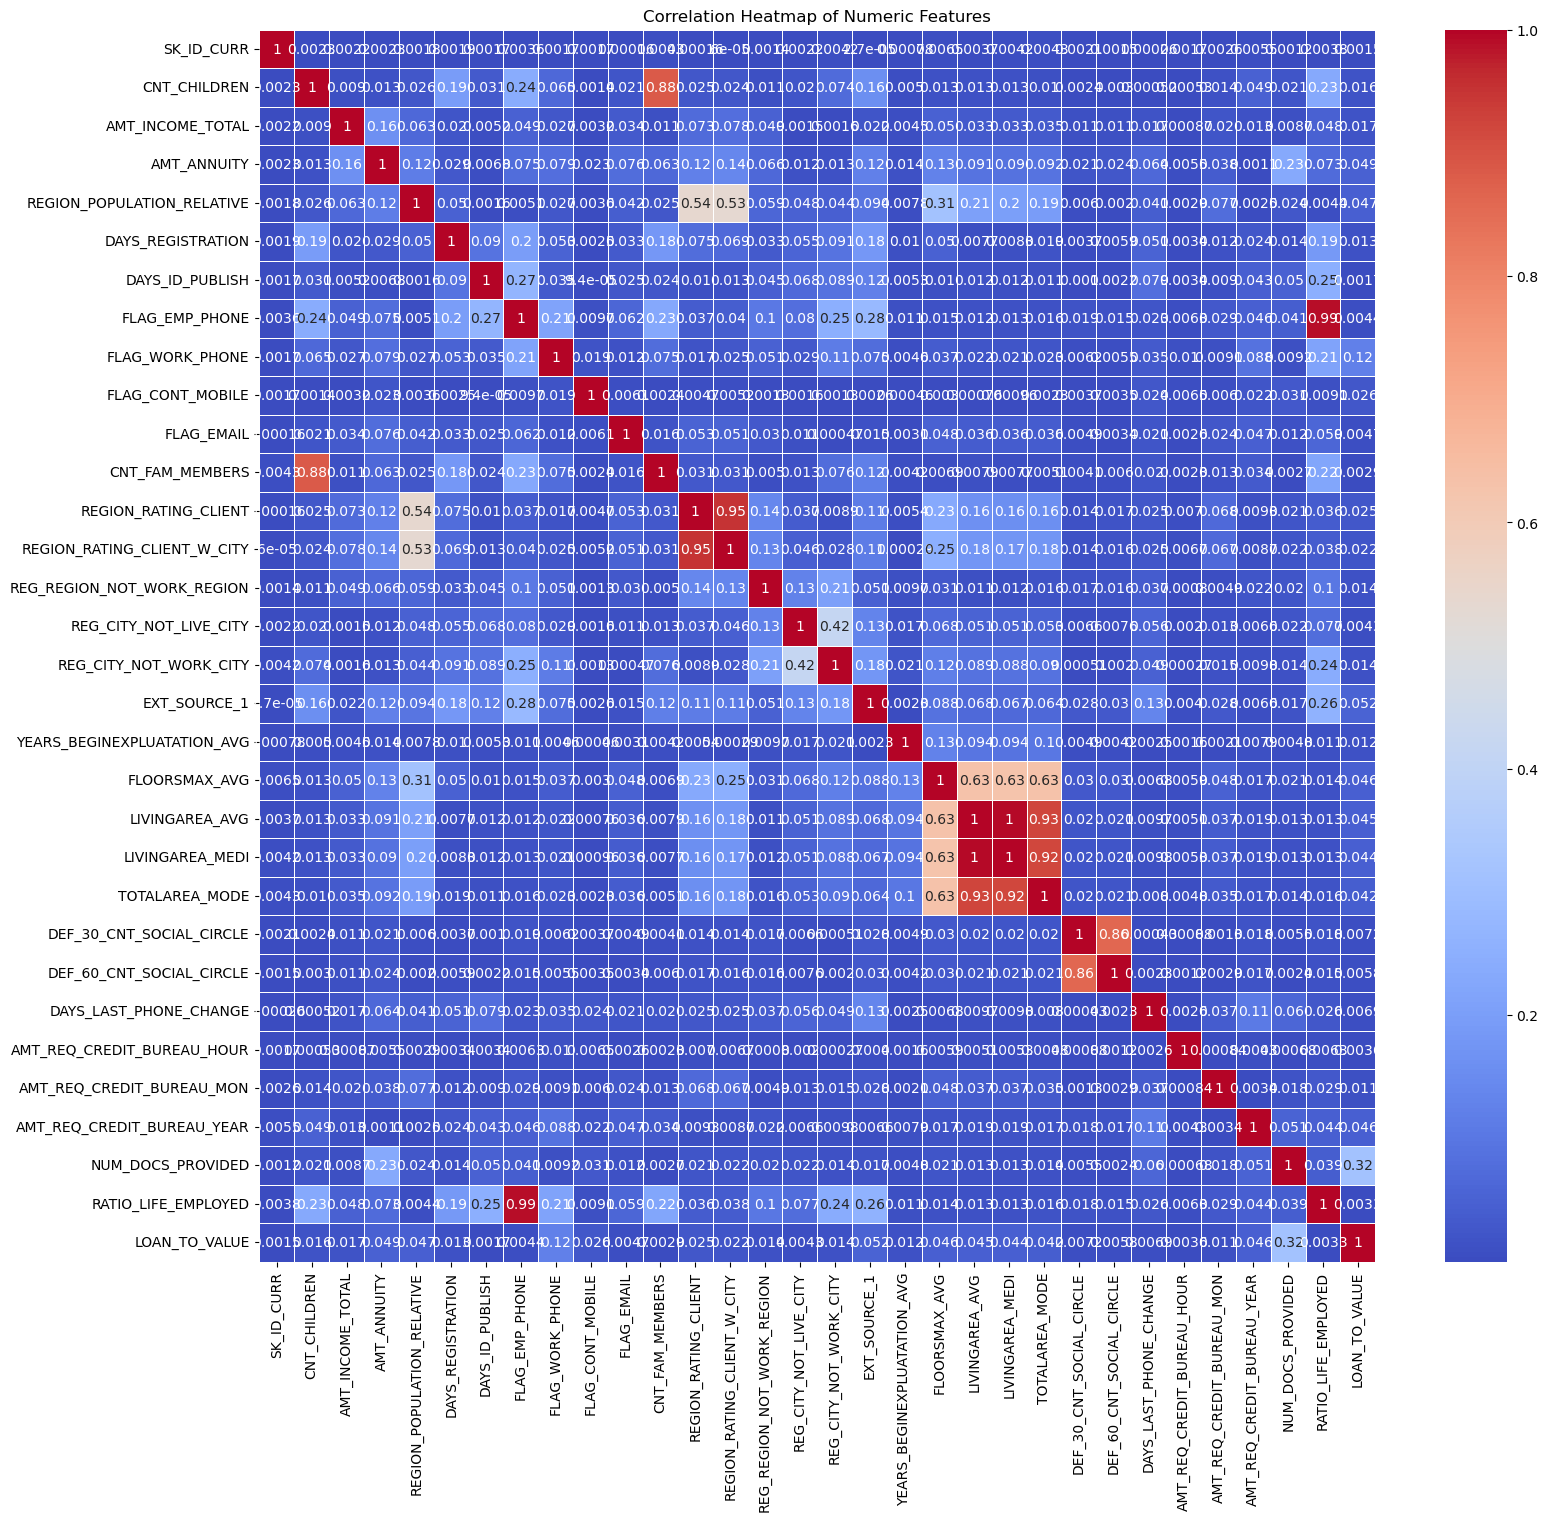

In [7]:
# Get numeric columns excluding target
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove("TARGET")

numeric_df = df[numeric_cols]
corr_matrix = numeric_df.corr().abs()


# Set figure size
plt.figure(figsize=(18, 16))

# Create heatmap
sns.heatmap(corr_matrix, 
            annot=True,
            cmap='coolwarm', 
            linewidths=0.5,
            cbar=True)

plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Using Domain Logic To Decide Which Variables To Drop :<br>
REG_CITY_NOT_WORK_CITY vs REG_CITY_NOT_LIVE_CITY <br>
Both reflect potential instability in the client's residence or work life. Slighlty overlapping but not the same. <br><br>

FLOORSMAX_AVG vs LIVINGAREA_AVG <br>
Correlation: 0.63  Keep both — they capture different aspects of the property<br><br>

AMT_GOODS_PRICE vs AMT_ANNUITY <br>
Even though highly correlated, One is the size of the loan. The other is payment burden<br><br>

Verdict - We will not drop any of the 4 numerical data with higher than average correlation. 

In [8]:

df.info()
df.to_csv("cleaned_application_data.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 207300 entries, 0 to 307509
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   207300 non-null  int64  
 1   TARGET                       207300 non-null  int64  
 2   NAME_CONTRACT_TYPE           207300 non-null  object 
 3   FLAG_OWN_CAR                 207300 non-null  object 
 4   FLAG_OWN_REALTY              207300 non-null  object 
 5   CNT_CHILDREN                 207300 non-null  int64  
 6   AMT_INCOME_TOTAL             207300 non-null  float64
 7   AMT_ANNUITY                  207297 non-null  float64
 8   NAME_INCOME_TYPE             207300 non-null  object 
 9   NAME_EDUCATION_TYPE          207300 non-null  object 
 10  NAME_FAMILY_STATUS           207300 non-null  object 
 11  NAME_HOUSING_TYPE            207300 non-null  object 
 12  REGION_POPULATION_RELATIVE   207300 non-null  float64
 13  DAYS

<h2> Flattening of Bureau Data

In [9]:
df = pd.read_csv("BureauData.csv")
# Using domain logic to drop columns not useful for aggregation
df = df.drop(columns=[
    "SK_ID_BUREAU",        # Only identifies individual credit records
    "CREDIT_CURRENCY",     # 99.9% = currency 1
    "DAYS_CREDIT_UPDATE"   # Too redundant with DAYS_CREDIT / END_DATE
])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   CREDIT_ACTIVE           object 
 2   DAYS_CREDIT             int64  
 3   CREDIT_DAY_OVERDUE      int64  
 4   DAYS_CREDIT_ENDDATE     float64
 5   DAYS_ENDDATE_FACT       float64
 6   AMT_CREDIT_MAX_OVERDUE  float64
 7   CNT_CREDIT_PROLONG      int64  
 8   AMT_CREDIT_SUM          float64
 9   AMT_CREDIT_SUM_DEBT     float64
 10  AMT_CREDIT_SUM_LIMIT    float64
 11  AMT_CREDIT_SUM_OVERDUE  float64
 12  CREDIT_TYPE             object 
 13  AMT_ANNUITY             float64
dtypes: float64(8), int64(4), object(2)
memory usage: 183.3+ MB


In [10]:
# Step 2: Aggregation
agg_map = {
    "DAYS_CREDIT": "min",
    "DAYS_CREDIT_ENDDATE": "mean",
    "CREDIT_DAY_OVERDUE": "max",
    "AMT_CREDIT_MAX_OVERDUE": "max",
    "AMT_CREDIT_SUM_OVERDUE": "sum",
    "AMT_CREDIT_SUM": ["sum", "mean"],
    "AMT_CREDIT_SUM_DEBT": ["sum", "mean"],
    "CNT_CREDIT_PROLONG": "sum"
}

bureau_agg = df.groupby("SK_ID_CURR").agg(agg_map)
bureau_agg.columns = ['_'.join(col).strip('_') for col in bureau_agg.columns]
bureau_agg = bureau_agg.reset_index()

In [11]:
# Step 3: Pivot CREDIT_ACTIVE counts
status_counts = (
    df.pivot_table(index="SK_ID_CURR", columns="CREDIT_ACTIVE", values="AMT_CREDIT_SUM", aggfunc="count", fill_value=0)
    .reset_index()
)
status_counts.columns = ["SK_ID_CURR"] + [f"CREDIT_ACTIVE_{c}" for c in status_counts.columns[1:]]


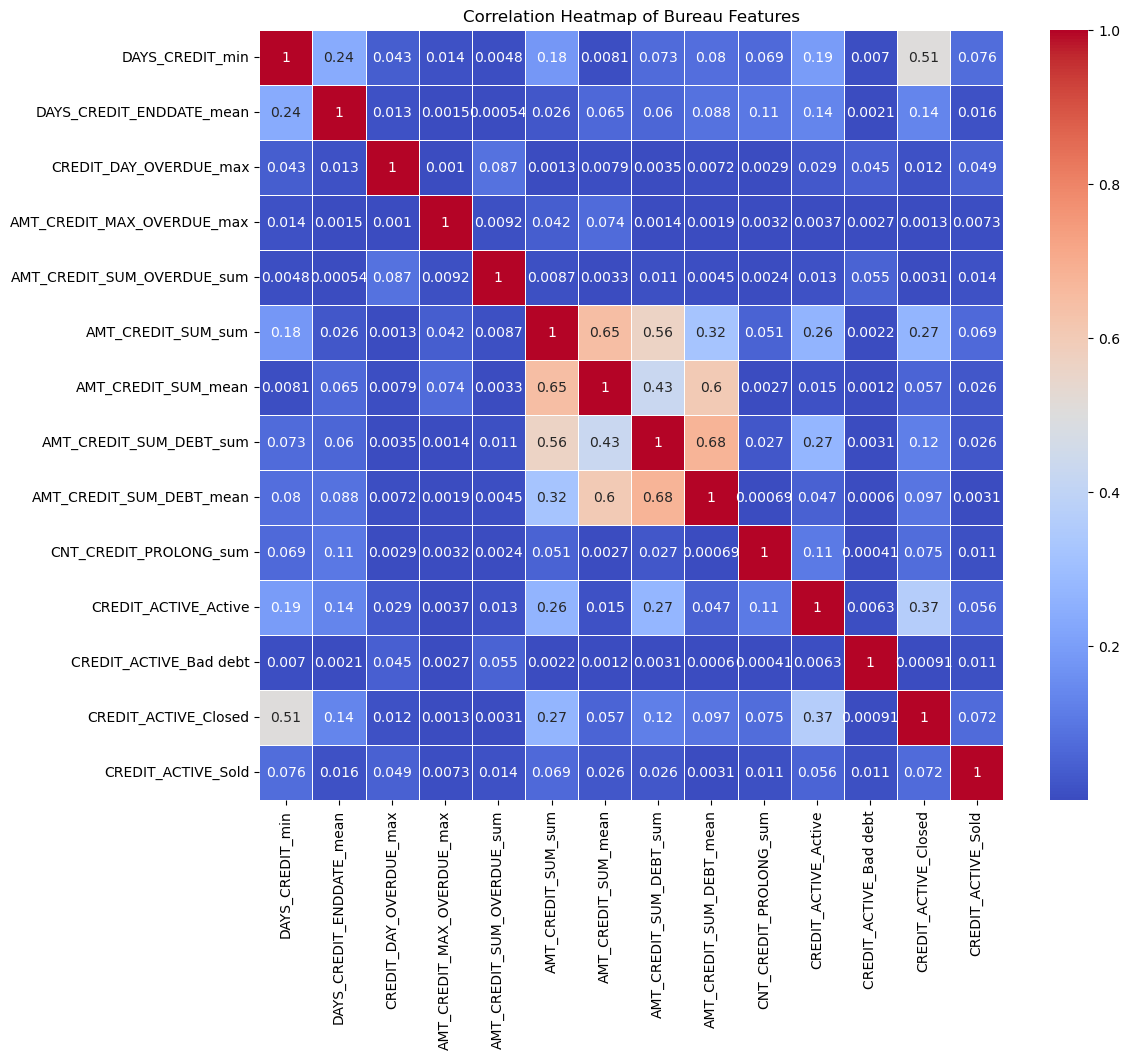

In [12]:
# Step 4: Merge everything
bureau_flat = bureau_agg.merge(status_counts, on="SK_ID_CURR", how="left")

# Step 5: Plot correlation heatmap
corr_matrix = bureau_flat.drop(columns="SK_ID_CURR").select_dtypes(include='number').corr().abs()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Bureau Features")
plt.show()

In [13]:
bureau_flat.to_csv("flattened_bureau_data.csv", index=False)

<h3> Merging Bureau Data and Application Data

In [14]:
#Load Cleaned Application Data
application_data = pd.read_csv("cleaned_application_data.csv")
application_data.head()

#Load Cleaned & Flattened Bureau Data
bureau_flat = pd.read_csv("flattened_bureau_data.csv")
bureau_flat.head()

#Merge Datasets on SK_ID_CURR
merged_data = application_data.merge(bureau_flat, on="SK_ID_CURR", how="left")
merged_data.drop(columns="SK_ID_CURR",inplace=True)
#Save the Final Merged Data to CSV
merged_data.to_csv("after_merge.csv", index=False)

#Preview Merged Data
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       207300 non-null  int64  
 1   NAME_CONTRACT_TYPE           207300 non-null  object 
 2   FLAG_OWN_CAR                 207300 non-null  object 
 3   FLAG_OWN_REALTY              207300 non-null  object 
 4   CNT_CHILDREN                 207300 non-null  int64  
 5   AMT_INCOME_TOTAL             207300 non-null  float64
 6   AMT_ANNUITY                  207297 non-null  float64
 7   NAME_INCOME_TYPE             207300 non-null  object 
 8   NAME_EDUCATION_TYPE          207300 non-null  object 
 9   NAME_FAMILY_STATUS           207300 non-null  object 
 10  NAME_HOUSING_TYPE            207300 non-null  object 
 11  REGION_POPULATION_RELATIVE   207300 non-null  float64
 12  DAYS_REGISTRATION            207300 non-null  float64
 13 

<h1> Grouping And Screening

<h3> Fine Classing

In [15]:
df = pd.read_csv('after_merge.csv')
df_orig = df.copy() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       207300 non-null  int64  
 1   NAME_CONTRACT_TYPE           207300 non-null  object 
 2   FLAG_OWN_CAR                 207300 non-null  object 
 3   FLAG_OWN_REALTY              207300 non-null  object 
 4   CNT_CHILDREN                 207300 non-null  int64  
 5   AMT_INCOME_TOTAL             207300 non-null  float64
 6   AMT_ANNUITY                  207297 non-null  float64
 7   NAME_INCOME_TYPE             207300 non-null  object 
 8   NAME_EDUCATION_TYPE          207300 non-null  object 
 9   NAME_FAMILY_STATUS           207300 non-null  object 
 10  NAME_HOUSING_TYPE            207300 non-null  object 
 11  REGION_POPULATION_RELATIVE   207300 non-null  float64
 12  DAYS_REGISTRATION            207300 non-null  float64
 13 

In [16]:
#convert to categorical
cols_to_object = [
    'NAME_CONTRACT_TYPE',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE',
    'FLAG_EMP_PHONE',         # binary (0/1)
    'FLAG_WORK_PHONE',        # binary
    'FLAG_CONT_MOBILE',       # binary
    'FLAG_EMAIL',             # binary
    'REG_REGION_NOT_WORK_REGION',  # binary
    'REG_CITY_NOT_LIVE_CITY',      # binary
    'REG_CITY_NOT_WORK_CITY',      # binary
]
for col in cols_to_object:
    if col in df.columns:
        df[col] = df[col].astype(str).astype('object')

for col in df.columns:
    if col not in cols_to_object:
        df[col] = pd.to_numeric(df[col], errors='coerce')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       207300 non-null  int64  
 1   NAME_CONTRACT_TYPE           207300 non-null  object 
 2   FLAG_OWN_CAR                 207300 non-null  object 
 3   FLAG_OWN_REALTY              207300 non-null  object 
 4   CNT_CHILDREN                 207300 non-null  int64  
 5   AMT_INCOME_TOTAL             207300 non-null  float64
 6   AMT_ANNUITY                  207297 non-null  float64
 7   NAME_INCOME_TYPE             207300 non-null  object 
 8   NAME_EDUCATION_TYPE          207300 non-null  object 
 9   NAME_FAMILY_STATUS           207300 non-null  object 
 10  NAME_HOUSING_TYPE            207300 non-null  object 
 11  REGION_POPULATION_RELATIVE   207300 non-null  float64
 12  DAYS_REGISTRATION            207300 non-null  float64
 13 

In [17]:
def calculate_iv_all(df, target_col='TARGET', bins=20):
    iv_summary = []
    
    # Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include='object').columns.tolist()

    # Remove target column from both
    numerical_cols = [col for col in numerical_cols if col != target_col]
    categorical_cols = [col for col in categorical_cols if col != target_col]

    # --- Numerical Features ---
    for col in numerical_cols:
        temp_df = df[[col, target_col]].copy()

        # Bin using qcut and fill missing with 'Missing'
        try:
            temp_df['Bin_Range'] = pd.qcut(temp_df[col], q=bins, duplicates='drop')
        except ValueError:
            print(f"Skipping {col} (not enough unique values to bin)")
            continue

        temp_df['Bin_Range'] = temp_df['Bin_Range'].astype(object).fillna('Missing')

        iv_summary.append({
            'Variable': col,
            'IV': _calculate_iv(temp_df, target_col)
        })

    # --- Categorical Features ---
    for col in categorical_cols:
        temp_df = df[[col, target_col]].copy()
        temp_df['Bin_Range'] = temp_df[col].astype(str).fillna('Missing')
        
        iv_summary.append({
            'Variable': col,
            'IV': _calculate_iv(temp_df, target_col)
        })

    # Return as sorted DataFrame
    iv_df = pd.DataFrame(iv_summary).sort_values(by='IV', ascending=False)
    return iv_df

# --- Helper Function ---
def _calculate_iv(temp_df, target_col):
    grouped = temp_df.groupby('Bin_Range')
    total_events = temp_df[target_col].sum()
    total_non_events = len(temp_df) - total_events

    iv_table = grouped.agg({target_col: ['count', 'sum']}).reset_index()
    iv_table.columns = ['Bin_Range', 'Count', 'Events']
    iv_table['Non_Events'] = iv_table['Count'] - iv_table['Events']
    iv_table['%_Events'] = iv_table['Events'] / total_events
    iv_table['%_Non_Events'] = iv_table['Non_Events'] / total_non_events

    # Avoid division by 0
    iv_table['WOE'] = np.log((iv_table['%_Non_Events'] + 1e-6) / (iv_table['%_Events'] + 1e-6))
    iv_table['IV'] = (iv_table['%_Non_Events'] - iv_table['%_Events']) * iv_table['WOE']

    return iv_table['IV'].sum()

In [18]:
iv_df = calculate_iv_all(df, target_col='TARGET', bins=20)
print(iv_df)

                       Variable        IV
9                  EXT_SOURCE_1  0.156003
23                LOAN_TO_VALUE  0.091847
22          RATIO_LIFE_EMPLOYED  0.088309
49              OCCUPATION_TYPE  0.080222
24              DAYS_CREDIT_min  0.078569
25     DAYS_CREDIT_ENDDATE_mean  0.075526
53            ORGANIZATION_TYPE  0.068933
32     AMT_CREDIT_SUM_DEBT_mean  0.054111
34         CREDIT_ACTIVE_Active  0.053558
41             NAME_INCOME_TYPE  0.050930
17       DAYS_LAST_PHONE_CHANGE  0.048573
42          NAME_EDUCATION_TYPE  0.048123
31      AMT_CREDIT_SUM_DEBT_sum  0.047867
3    REGION_POPULATION_RELATIVE  0.040241
11                FLOORSMAX_AVG  0.039137
5               DAYS_ID_PUBLISH  0.037855
14               TOTALAREA_MODE  0.036709
36         CREDIT_ACTIVE_Closed  0.034317
13              LIVINGAREA_MEDI  0.033961
12               LIVINGAREA_AVG  0.033893
10  YEARS_BEGINEXPLUATATION_AVG  0.030477
2                   AMT_ANNUITY  0.029797
52       REG_CITY_NOT_WORK_CITY  0

<h3> Characteristic Screening

In [19]:
important_vars = [
    'EXT_SOURCE_1',                   # 0.156003
    'LOAN_TO_VALUE',                  # 0.091847
    'RATIO_LIFE_EMPLOYED',           # 0.088309
    'OCCUPATION_TYPE',               # 0.080222
    'DAYS_CREDIT_min',               # 0.078569 (most recent credit record)
    'DAYS_CREDIT_ENDDATE_mean',      # 0.075526 (avg number of days until loan end)
    'ORGANIZATION_TYPE',             # 0.068933
    'AMT_CREDIT_SUM_DEBT_mean',      # 0.054111 (avg debt per credit)
    'CREDIT_ACTIVE_Active',          # 0.053558 (count of active credits)
    'NAME_INCOME_TYPE',              # 0.050930
    'DAYS_LAST_PHONE_CHANGE',        # 0.048573
    'NAME_EDUCATION_TYPE',           # 0.048123
    'AMT_CREDIT_SUM_DEBT_sum',       # 0.047867 (total debt from bureau)
    'REGION_POPULATION_RELATIVE',    # 0.040241
    'FLOORSMAX_AVG',                 # 0.039137
    'DAYS_ID_PUBLISH',               # 0.037855
    'TARGET'                         # target label for supervised learning
]

df.drop(columns=[col for col in df.columns if col not in important_vars], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      207300 non-null  int64  
 1   NAME_INCOME_TYPE            207300 non-null  object 
 2   NAME_EDUCATION_TYPE         207300 non-null  object 
 3   REGION_POPULATION_RELATIVE  207300 non-null  float64
 4   DAYS_ID_PUBLISH             207300 non-null  int64  
 5   OCCUPATION_TYPE             207300 non-null  object 
 6   ORGANIZATION_TYPE           207300 non-null  object 
 7   EXT_SOURCE_1                89268 non-null   float64
 8   FLOORSMAX_AVG               105336 non-null  float64
 9   DAYS_LAST_PHONE_CHANGE      207299 non-null  float64
 10  RATIO_LIFE_EMPLOYED         207300 non-null  float64
 11  LOAN_TO_VALUE               207077 non-null  float64
 12  DAYS_CREDIT_min             176852 non-null  float64
 13  DAYS_CREDIT_EN

In [20]:
df.to_csv("after_fine_classing.csv", index=False)

<h3>Functions for Coarse Classing

In [18]:
def woe_iv(data, variable_name):
    working_data = data.copy()
    working_data['Bin_Range'] = working_data['Bin_Range'].astype(str).fillna('Missing')

    variable_data = pd.DataFrame()
    variable_data['Bin_Range'] = working_data.groupby('Bin_Range', as_index=False).count()['Bin_Range']
    variable_data['Count'] = working_data.groupby('Bin_Range')['TARGET'].count().values
    variable_data['Events'] = working_data.groupby('Bin_Range')['TARGET'].sum().values
    variable_data['Non_Events'] = variable_data['Count'] - variable_data['Events']

    variable_data['%_of_Events'] = variable_data['Events'] / sum(variable_data['Events'])
    variable_data['%_of_Non_Events'] = variable_data['Non_Events'] / sum(variable_data['Non_Events'])

    variable_data['WOE'] = np.log((variable_data['%_of_Non_Events'] + 1e-6) / (variable_data['%_of_Events'] + 1e-6))
    variable_data['IV'] = (variable_data['%_of_Non_Events'] - variable_data['%_of_Events']) * variable_data['WOE']

    IV = variable_data['IV'].sum()
    return IV, variable_data


In [19]:
def woe_iv_plot(data, variable_name):
    IV, variable_data = woe_iv(data, variable_name)
    print(f"IV for {variable_name} with {variable_data.shape[0]} bins: {round(IV, 4)}")

    fig_width = max(20, len(variable_data['Bin_Range']) * 0.6)
    fig, ax1 = plt.subplots(figsize=(fig_width, 6))
    variable_data = variable_data.copy()
    variable_data['Bin_Range'] = variable_data['Bin_Range'].astype(str)

    # Plot WOE line
    sns.lineplot(data=variable_data, x='Bin_Range', y='WOE', marker='o', ax=ax1, label='WOE', color='black')
    for i, row in variable_data.iterrows():
        ax1.text(i, row['WOE'], f"{row['WOE']:.2f}", ha='center', va='bottom', fontsize=10, color='black')
    ax1.set_ylabel("WOE", fontsize=12)
    ax1.tick_params(axis='x', rotation=45)

    # Plot stacked bar for good and bad percentages
    ax2 = ax1.twinx()
    width = 0.5
    r = np.arange(len(variable_data))
    ax2.bar(r, variable_data['%_of_Events'], width=width, label='% Good', color='green', alpha=0.3)
    ax2.bar(r, variable_data['%_of_Non_Events'], width=width, bottom=variable_data['%_of_Events'], label='% Bad', color='red', alpha=0.6)
    ax2.set_ylabel("Proportion of Records", fontsize=12)
    ax2.set_xticks(r)
    ax2.set_xticklabels(variable_data['Bin_Range'], rotation=45)

    ax2.legend(loc='upper right')
    plt.title(f"WOE Plot for {variable_name}")
    plt.tight_layout()
    plt.show()

In [20]:
def plot_numeric_woe(df, variable, bins):
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
    woe_bin_data = df[[variable, "TARGET"]].copy()
    woe_bin_data['Bin_Range'] = pd.qcut(woe_bin_data[variable], q=bins, duplicates='drop')
    woe_bin_data['Bin_Range'] = woe_bin_data['Bin_Range'].astype(str).fillna('Missing')
    woe_iv_plot(woe_bin_data, variable)

def plot_numeric_woe_manual(df, variable, bin_edges):
    df = df[[variable, 'TARGET']].copy()
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
    df['Bin_Range'] = pd.cut(df[variable], bins=bin_edges, include_lowest=True)
    df['Bin_Range'] = df['Bin_Range'].astype(str).fillna('Missing')

    IV, variable_data = woe_iv(df, variable)
    variable_data = variable_data.sort_values(by='WOE').reset_index(drop=True)

    print(f"\nIV for {variable} with {variable_data.shape[0]} bins: {round(IV, 4)}")
    print("WOE values per Bin_Range:")
    for _, row in variable_data.iterrows():
        print(f"  {row['Bin_Range']}: WOE = {row['WOE']:.6f}")
    
    woe_iv_plot(df, variable)


In [21]:
def woe_iv_plot_categorical(df, variable_name, target_name='TARGET'):
    """
    Plots WOE values for a categorical variable, with % good and bad bars stacked.
    Also displays IV on the plot.
    """
    working_data = df[[variable_name, target_name]].copy()
    working_data[variable_name] = working_data[variable_name].fillna('Missing')
    working_data['Bin_Range'] = working_data[variable_name].astype(str)

    IV, variable_data = woe_iv(working_data, variable_name)
    variable_data = variable_data.sort_values(by='WOE', ascending=True).reset_index(drop=True)

    fig_width = max(20, len(variable_data['Bin_Range']) * 0.6)
    fig, ax1 = plt.subplots(figsize=(fig_width, 6))

    r = range(len(variable_data))
    width = 0.5
    ax2 = ax1.twinx()
    ax2.bar(r, variable_data['%_of_Events'], width=width, label='% Good', color='green', alpha=0.3)
    ax2.bar(r, variable_data['%_of_Non_Events'], bottom=variable_data['%_of_Events'],
            width=width, label='% Bad', color='red', alpha=0.3)
    ax2.set_ylabel("Event Distribution", fontsize=12)
    ax2.set_xticks(r)
    ax2.set_xticklabels(variable_data['Bin_Range'], rotation=45, ha='right', fontsize=10)
    ax2.tick_params(axis='x', labelsize=10)

    sns.lineplot(x=r, y=variable_data['WOE'], marker='o', ax=ax1, color='black', label='WOE')
    ax1.set_ylabel("WOE", fontsize=12)

    # Display IV in plot title
    plt.title(f"WOE Plot for {variable_name}\nInformation Value (IV) = {IV:.6f}", fontsize=14)
    fig.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


def woe_iv_plot_categorical_manual(df, variable_name, cut_indices, target_name='TARGET'):
    """
    Manually groups categories based on cut indices, plots WOE, and prints IV before/after and WOE values per grouped bin.
    """
    working_data = df[[variable_name, target_name]].copy()
    working_data[variable_name] = working_data[variable_name].fillna('Missing')
    working_data['Bin_Range'] = working_data[variable_name].astype(str)

    # Step 1: Original WOE and IV (before binning)
    IV_before, variable_data_before = woe_iv(working_data, variable_name)
    sorted_categories = variable_data_before.sort_values('WOE')['Bin_Range'].tolist()

    # Step 2: Group categories based on cut_indices
    grouped_mapping = {}
    group_labels = []
    raw_group_labels = []  # For printing purposes

    for i in range(len(cut_indices) - 1):
        group = sorted_categories[cut_indices[i]:cut_indices[i + 1]]
        raw_label = ', '.join(group)
        label_wrapped = textwrap.fill(raw_label, width=30)
        group_labels.append(label_wrapped)
        raw_group_labels.append(raw_label)
        for cat in group:
            grouped_mapping[cat] = label_wrapped

    # Step 3: Apply grouped binning
    working_data['Bin_Range'] = working_data['Bin_Range'].map(grouped_mapping).fillna(working_data['Bin_Range'])

    # Step 4: Recalculate WOE and IV (after binning)
    IV_after, variable_data_grouped = woe_iv(working_data, variable_name)
    variable_data_grouped = variable_data_grouped.sort_values(by='WOE').reset_index(drop=True)

    # Step 5: Plot
    fig_width = max(22, len(variable_data_grouped['Bin_Range']) * 0.9)
    fig, ax1 = plt.subplots(figsize=(fig_width, 6))
    r = range(len(variable_data_grouped))
    width = 0.5

    ax2 = ax1.twinx()
    ax2.bar(r, variable_data_grouped['%_of_Events'], width=width, label='% Good', color='green', alpha=0.3)
    ax2.bar(r, variable_data_grouped['%_of_Non_Events'], bottom=variable_data_grouped['%_of_Events'],
            width=width, label='% Bad', color='red', alpha=0.3)
    ax2.set_ylabel("Event Distribution", fontsize=12)
    ax2.set_xticks(r)
    ax2.set_xticklabels(variable_data_grouped['Bin_Range'], rotation=30, ha='right', fontsize=9)

    sns.lineplot(x=r, y=variable_data_grouped['WOE'], marker='o', ax=ax1, color='black', label='WOE')
    for i, row in variable_data_grouped.iterrows():
        ax1.text(i, row['WOE'], f"{row['WOE']:.6f}", ha='center', va='bottom', fontsize=9, color='black')

    ax1.set_ylabel("WOE", fontsize=12)
    plt.title(
        f"WOE Plot (Grouped) for {variable_name}\nIV Before Binning = {IV_before:.6f} | IV After Binning = {IV_after:.6f}",
        fontsize=13
    )
    fig.legend(loc='upper right')
    plt.tight_layout(pad=2)
    plt.show()

    # Step 6: Print summary
    print(f"\nInformation Value (IV) Before Binning: {IV_before:.6f}")
    print(f"Information Value (IV) After Binning:  {IV_after:.6f}")
    print("\nWOE for each grouped bin:")
    for i, row in variable_data_grouped.iterrows():
        print(f"Group {i + 1}:")
        print(f"  Categories: {raw_group_labels[i]}")
        print(f"  WOE: {row['WOE']:.6f}\n")

<h2> Coarse Classing

In [38]:
df = pd.read_csv('after_fine_classing.csv')
df.orig = df.copy() 
df["TARGET"] = pd.to_numeric(df["TARGET"], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      207300 non-null  int64  
 1   NAME_INCOME_TYPE            207300 non-null  object 
 2   NAME_EDUCATION_TYPE         207300 non-null  object 
 3   REGION_POPULATION_RELATIVE  207300 non-null  float64
 4   DAYS_ID_PUBLISH             207300 non-null  int64  
 5   OCCUPATION_TYPE             143111 non-null  object 
 6   ORGANIZATION_TYPE           207300 non-null  object 
 7   EXT_SOURCE_1                89268 non-null   float64
 8   FLOORSMAX_AVG               105336 non-null  float64
 9   DAYS_LAST_PHONE_CHANGE      207299 non-null  float64
 10  RATIO_LIFE_EMPLOYED         207300 non-null  float64
 11  LOAN_TO_VALUE               207077 non-null  float64
 12  DAYS_CREDIT_min             176852 non-null  float64
 13  DAYS_CREDIT_EN

IV for EXT_SOURCE_1 with 21 bins: 0.156


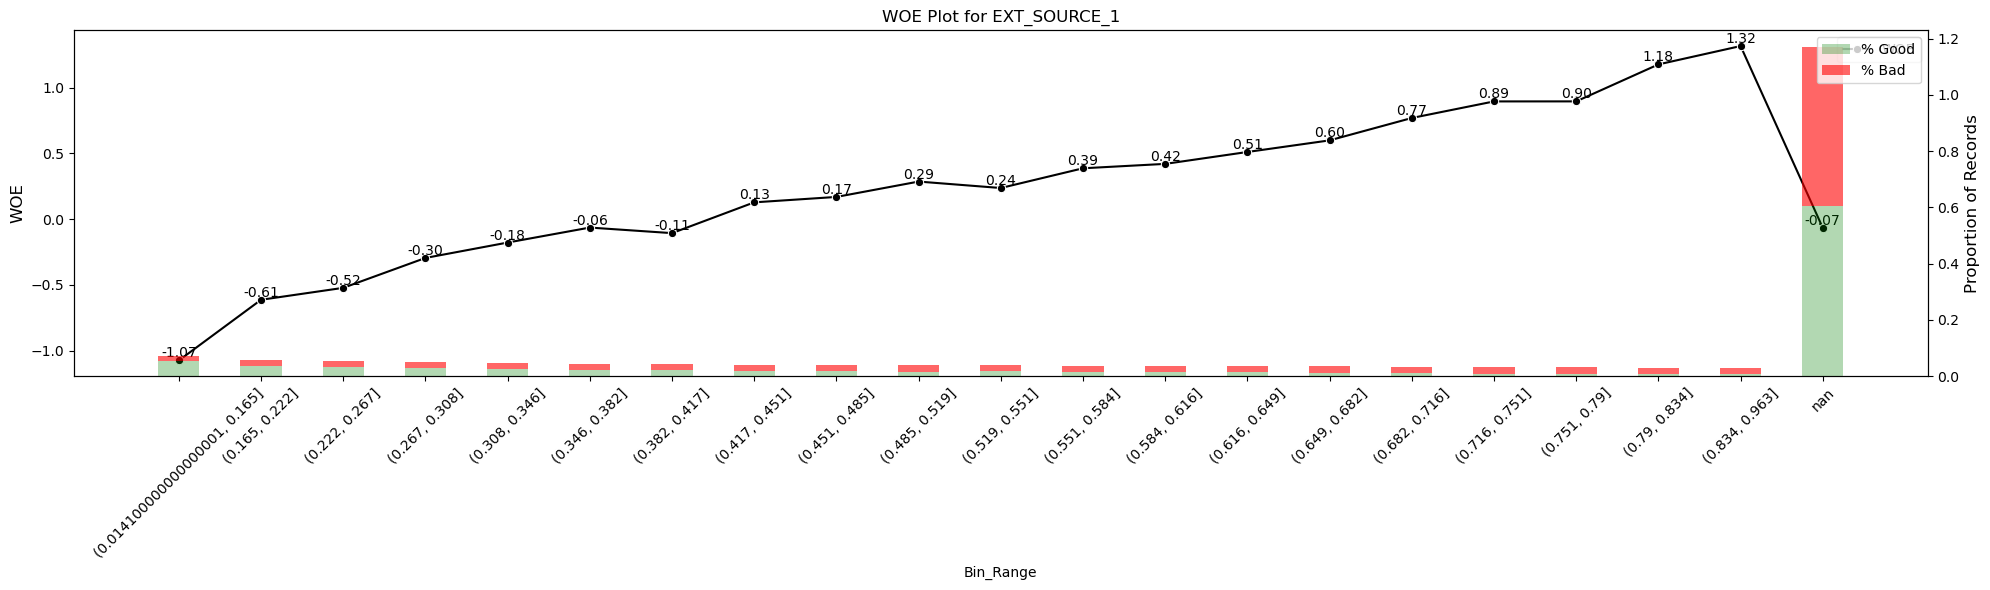


IV for EXT_SOURCE_1 with 6 bins: 0.1455
WOE values per Bin_Range:
  (-0.001, 0.2]: WOE = -0.944086
  (0.2, 0.4]: WOE = -0.286087
  nan: WOE = -0.066502
  (0.4, 0.6]: WOE = 0.220192
  (0.6, 0.8]: WOE = 0.715789
  (0.8, 1.0]: WOE = 1.255695
IV for EXT_SOURCE_1 with 6 bins: 0.1455


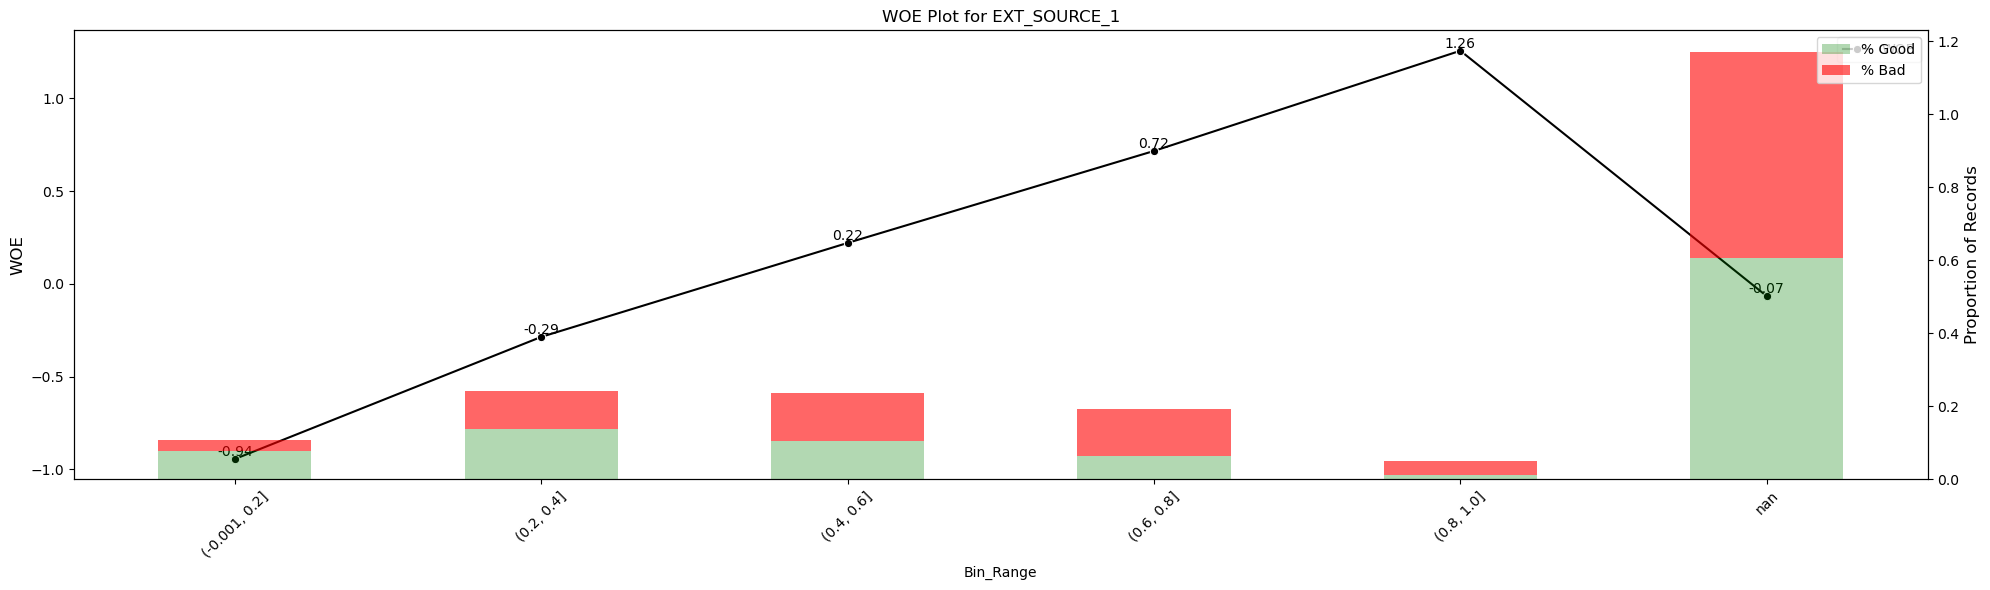

In [57]:
plot_numeric_woe(df, 'EXT_SOURCE_1', 20)
plot_numeric_woe_manual(df, 'EXT_SOURCE_1', [0,0.2, 0.4, 0.6,0.8,1])

IV for LOAN_TO_VALUE with 15 bins: 0.0918


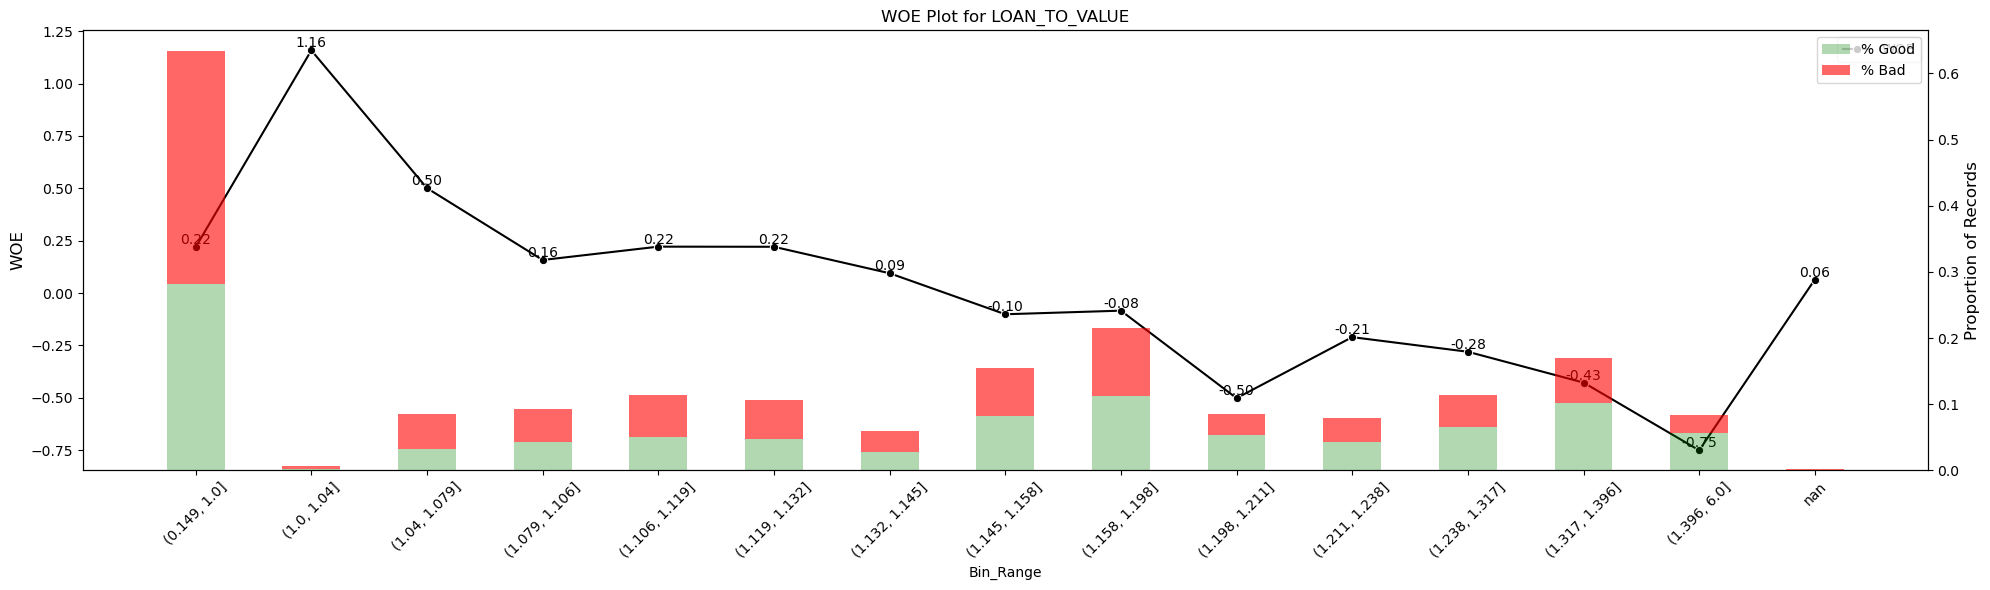


IV for LOAN_TO_VALUE with 3 bins: 0.0222
WOE values per Bin_Range:
  (1.0, 6.0]: WOE = -0.101539
  nan: WOE = 0.064642
  (-0.001, 1.0]: WOE = 0.219235
IV for LOAN_TO_VALUE with 3 bins: 0.0222


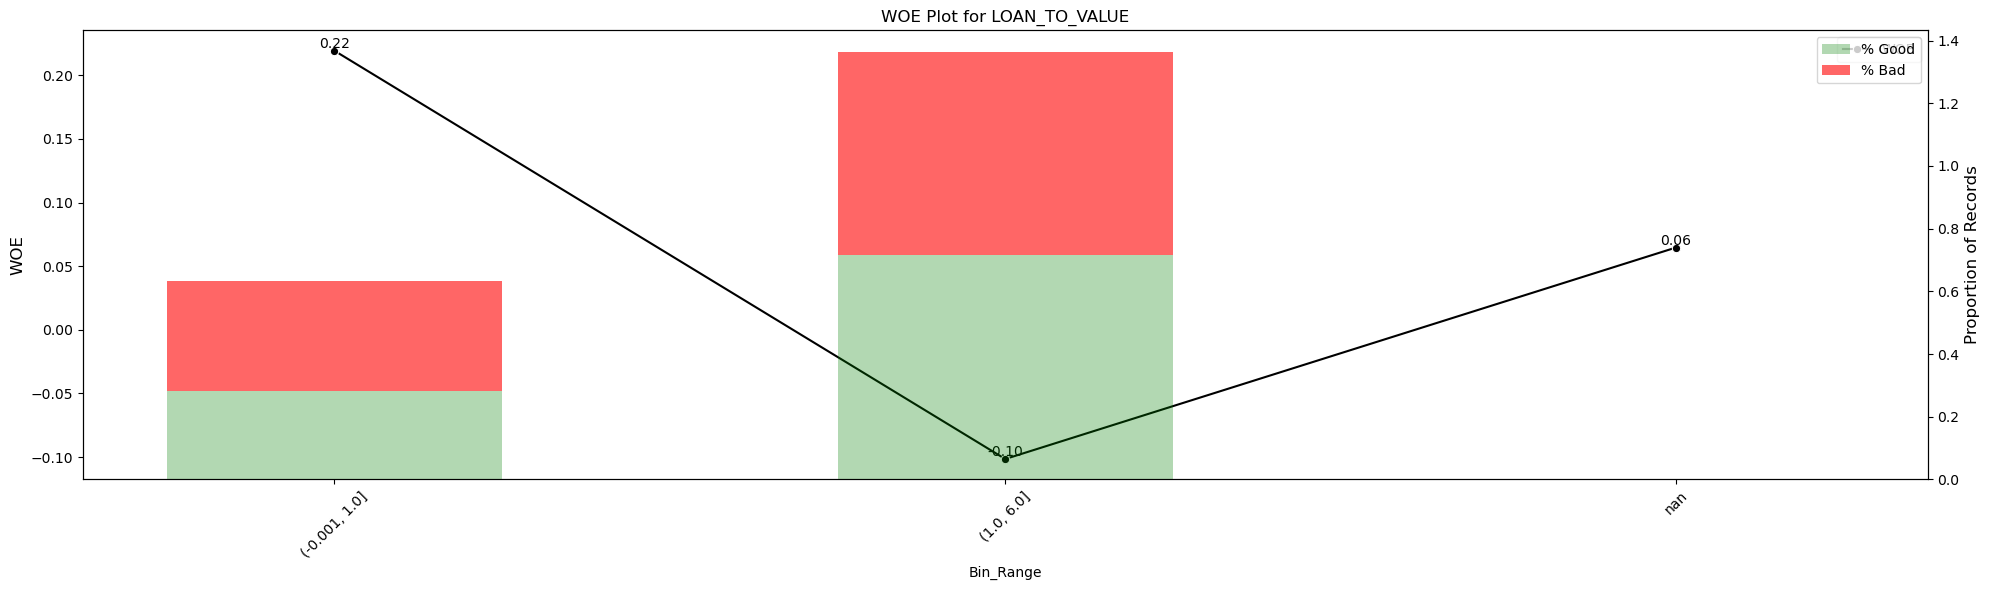

In [23]:
plot_numeric_woe(df, 'LOAN_TO_VALUE', 20)
plot_numeric_woe_manual(df, 'LOAN_TO_VALUE', [0,1,6])

IV for RATIO_LIFE_EMPLOYED with 20 bins: 0.0883


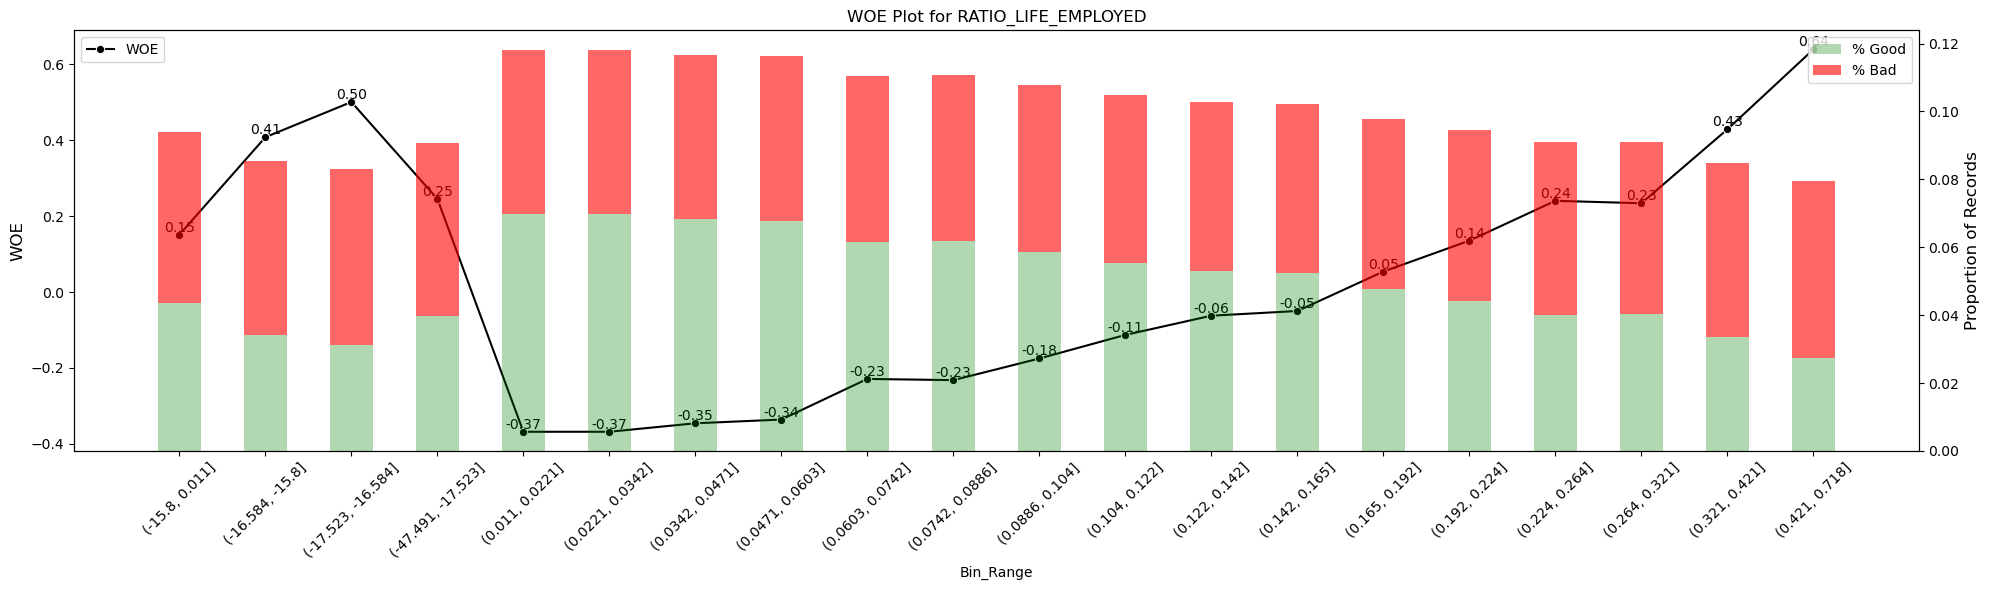


IV for RATIO_LIFE_EMPLOYED with 5 bins: 0.085
WOE values per Bin_Range:
  (0.0, 0.1]: WOE = -0.292114
  (0.1, 0.2]: WOE = -0.043307
  (0.2, 0.3]: WOE = 0.220441
  (-47.001, 0.0]: WOE = 0.391251
  nan: WOE = 0.475725
IV for RATIO_LIFE_EMPLOYED with 5 bins: 0.085


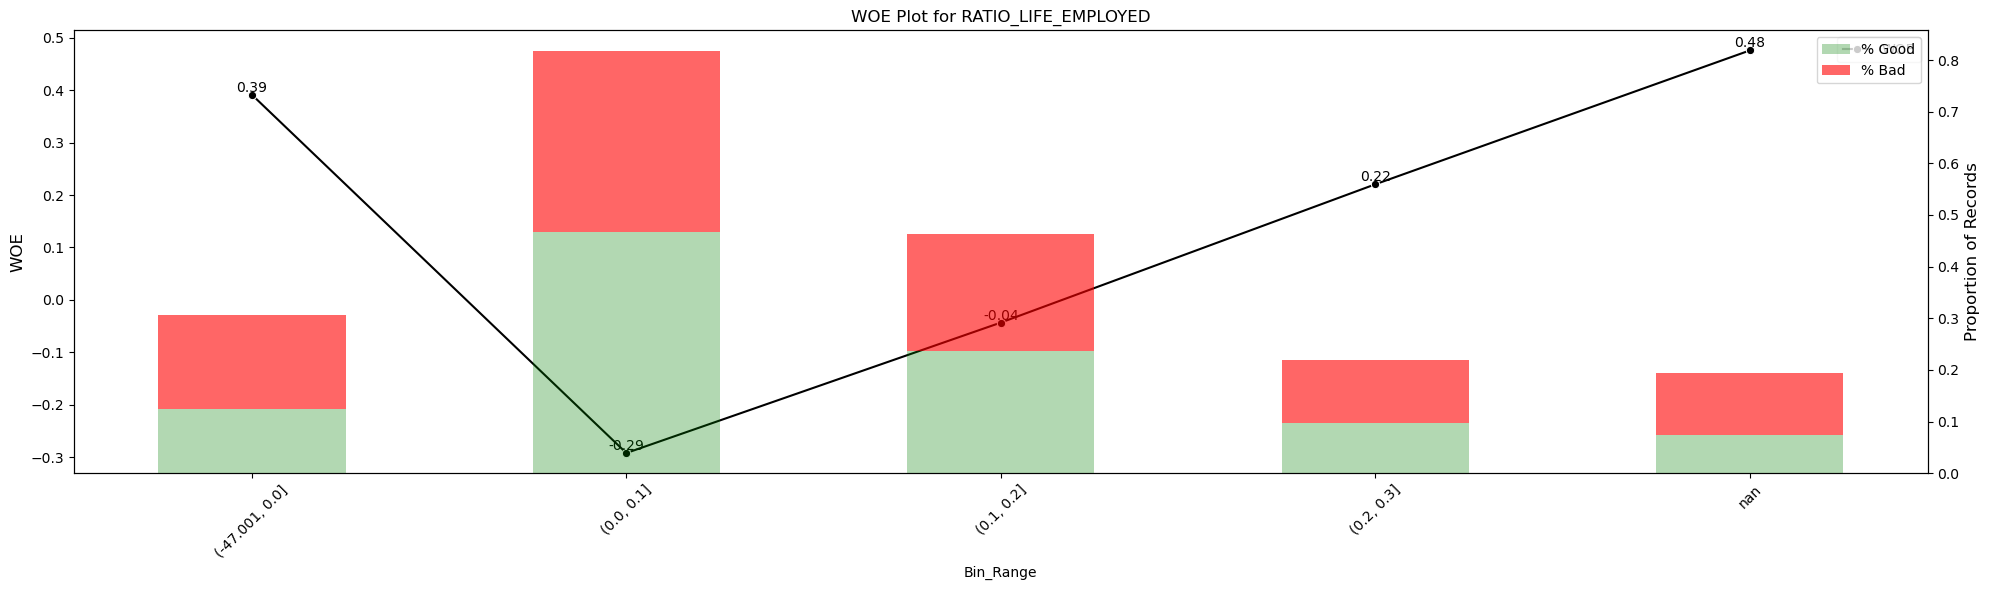

In [52]:
plot_numeric_woe(df, 'RATIO_LIFE_EMPLOYED', 20)
plot_numeric_woe_manual(df, 'RATIO_LIFE_EMPLOYED', [-47,0, 0.1, 0.2 ,0.3])

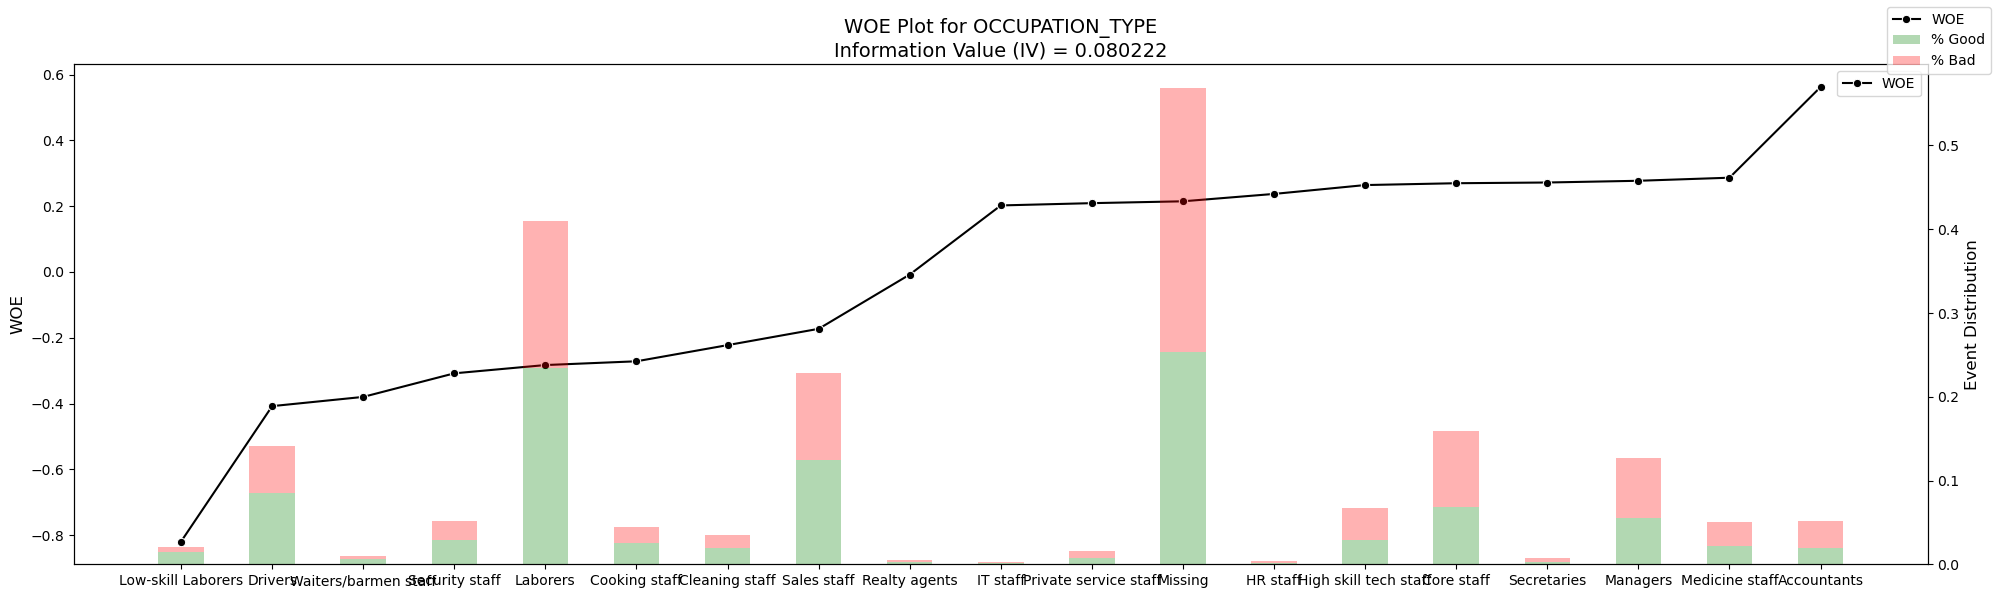

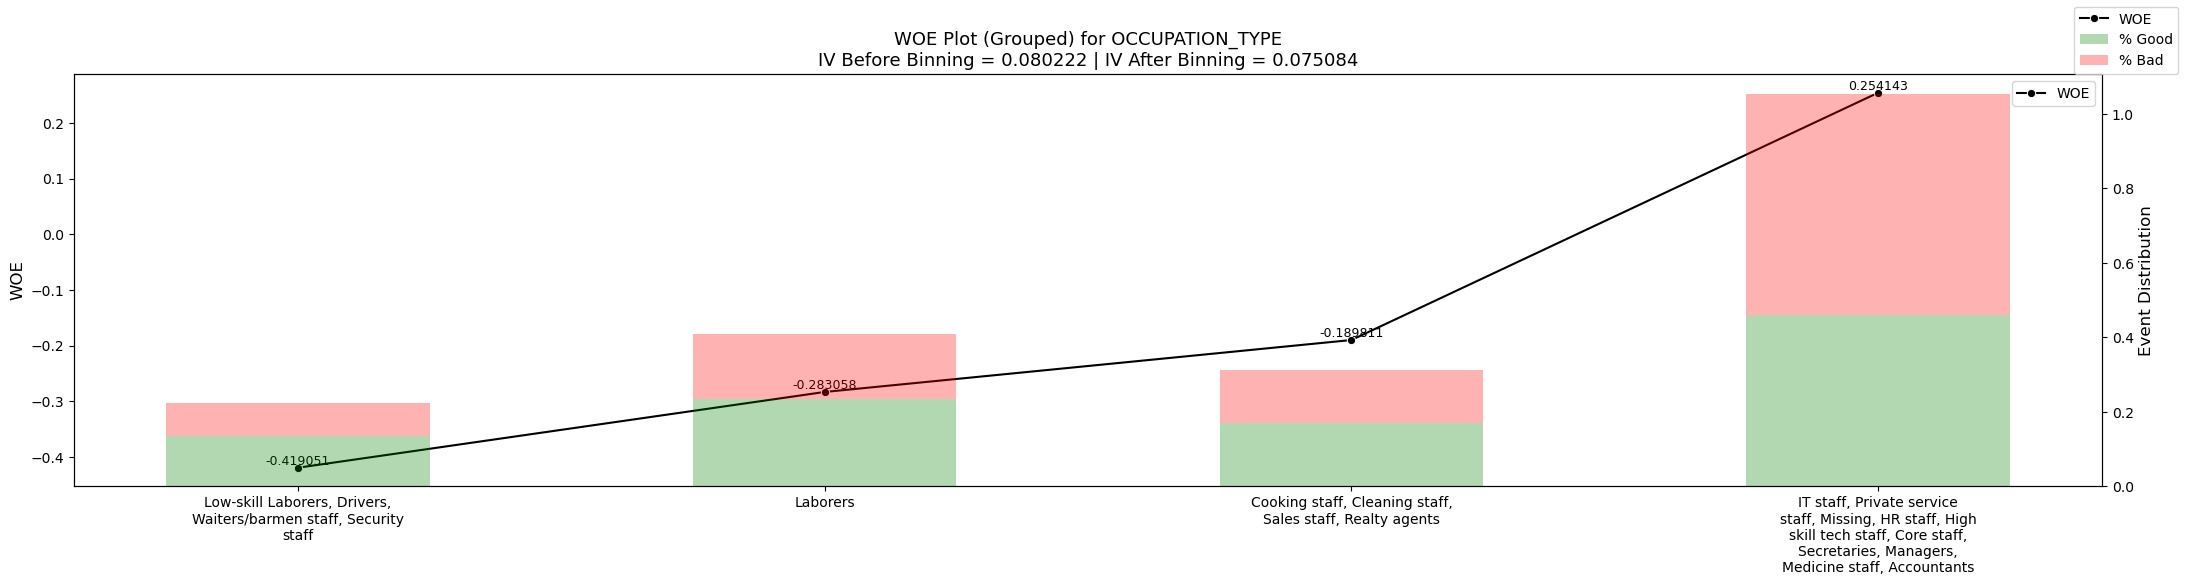


Information Value (IV) Before Binning: 0.080222
Information Value (IV) After Binning:  0.075084

WOE for each grouped bin:
Group 1:
  Categories: Low-skill Laborers, Drivers, Waiters/barmen staff, Security staff
  WOE: -0.419051

Group 2:
  Categories: Laborers
  WOE: -0.283058

Group 3:
  Categories: Cooking staff, Cleaning staff, Sales staff, Realty agents
  WOE: -0.189811

Group 4:
  Categories: IT staff, Private service staff, Missing, HR staff, High skill tech staff, Core staff, Secretaries, Managers, Medicine staff, Accountants
  WOE: 0.254143



In [59]:
woe_iv_plot_categorical(df, "OCCUPATION_TYPE", target_name='TARGET')
woe_iv_plot_categorical_manual(df, "OCCUPATION_TYPE", [0,4,5,9,19], target_name='TARGET')

IV for DAYS_CREDIT_min with 21 bins: 0.0786


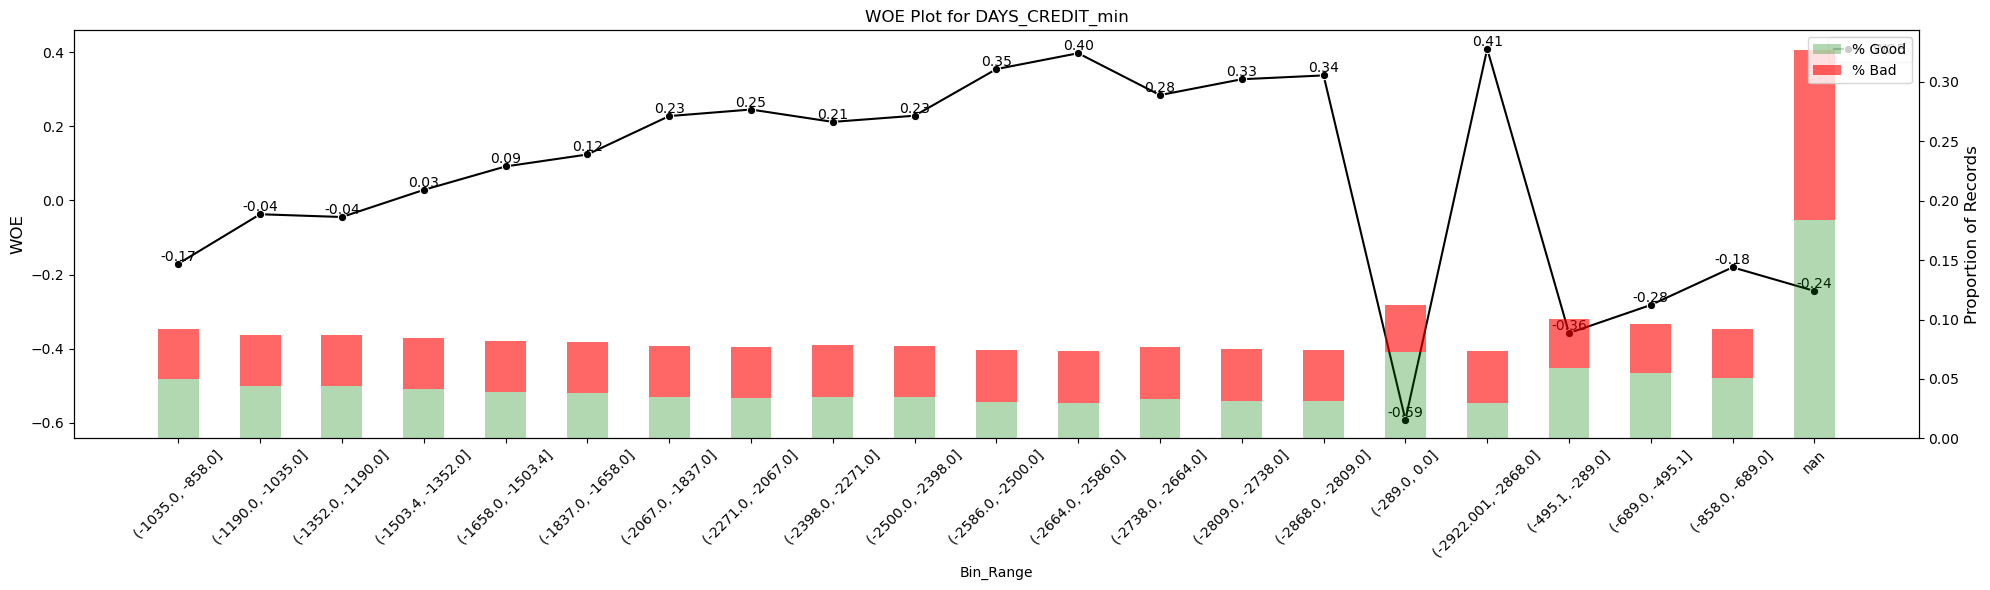


IV for DAYS_CREDIT_min with 5 bins: 0.0638
WOE values per Bin_Range:
  (-1000.0, -200.0]: WOE = -0.285150
  nan: WOE = -0.259792
  (-1500.0, -1000.0]: WOE = -0.025217
  (-2500.0, -1500.0]: WOE = 0.186869
  (-2900.001, -2500.0]: WOE = 0.346265
IV for DAYS_CREDIT_min with 5 bins: 0.0638


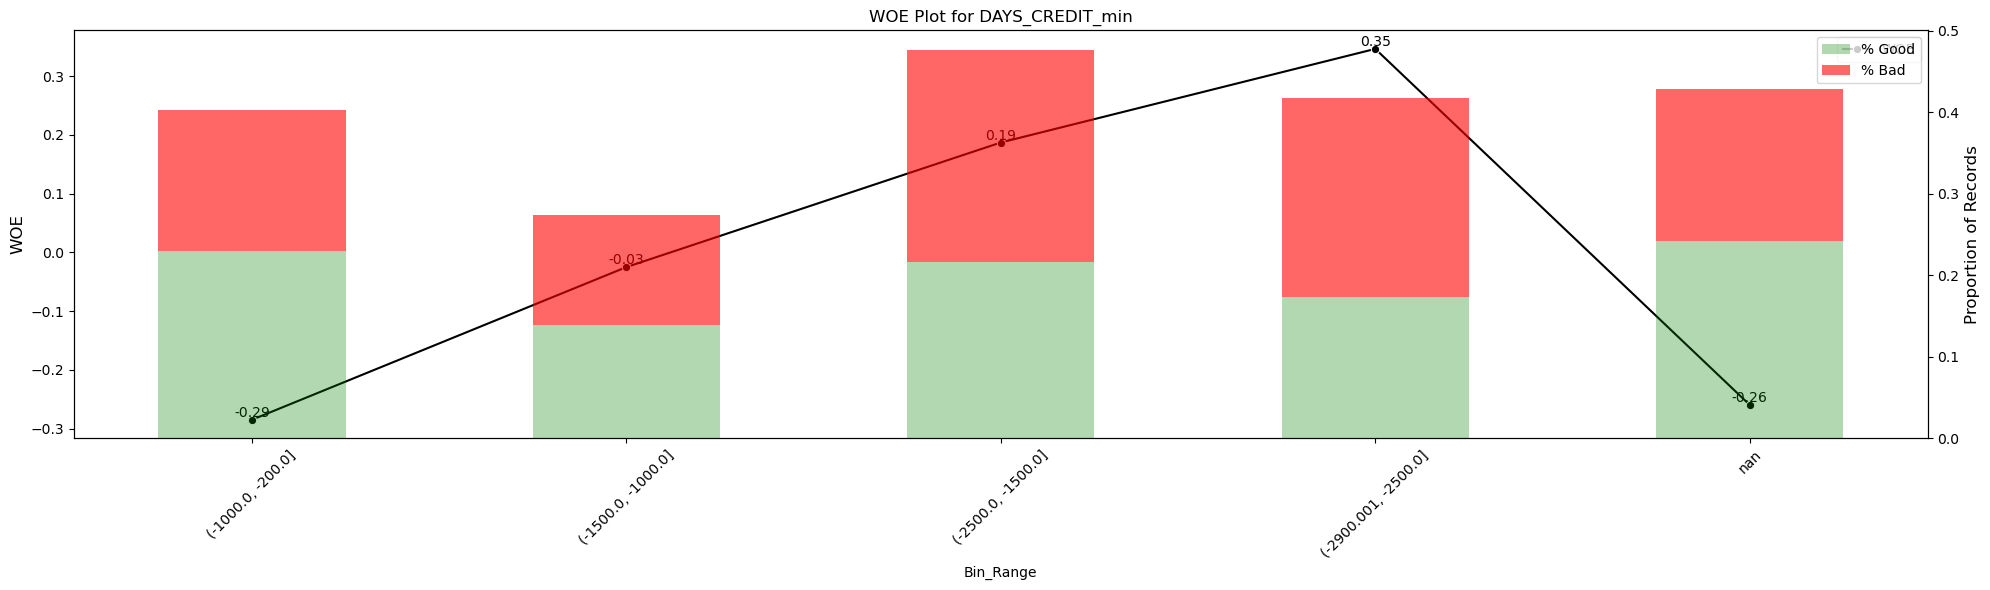

In [24]:
plot_numeric_woe(df, 'DAYS_CREDIT_min', 20)
plot_numeric_woe_manual(df, 'DAYS_CREDIT_min', [-2900,-2500,-1500, -1000, -200])

IV for DAYS_CREDIT_ENDDATE_mean with 21 bins: 0.0755


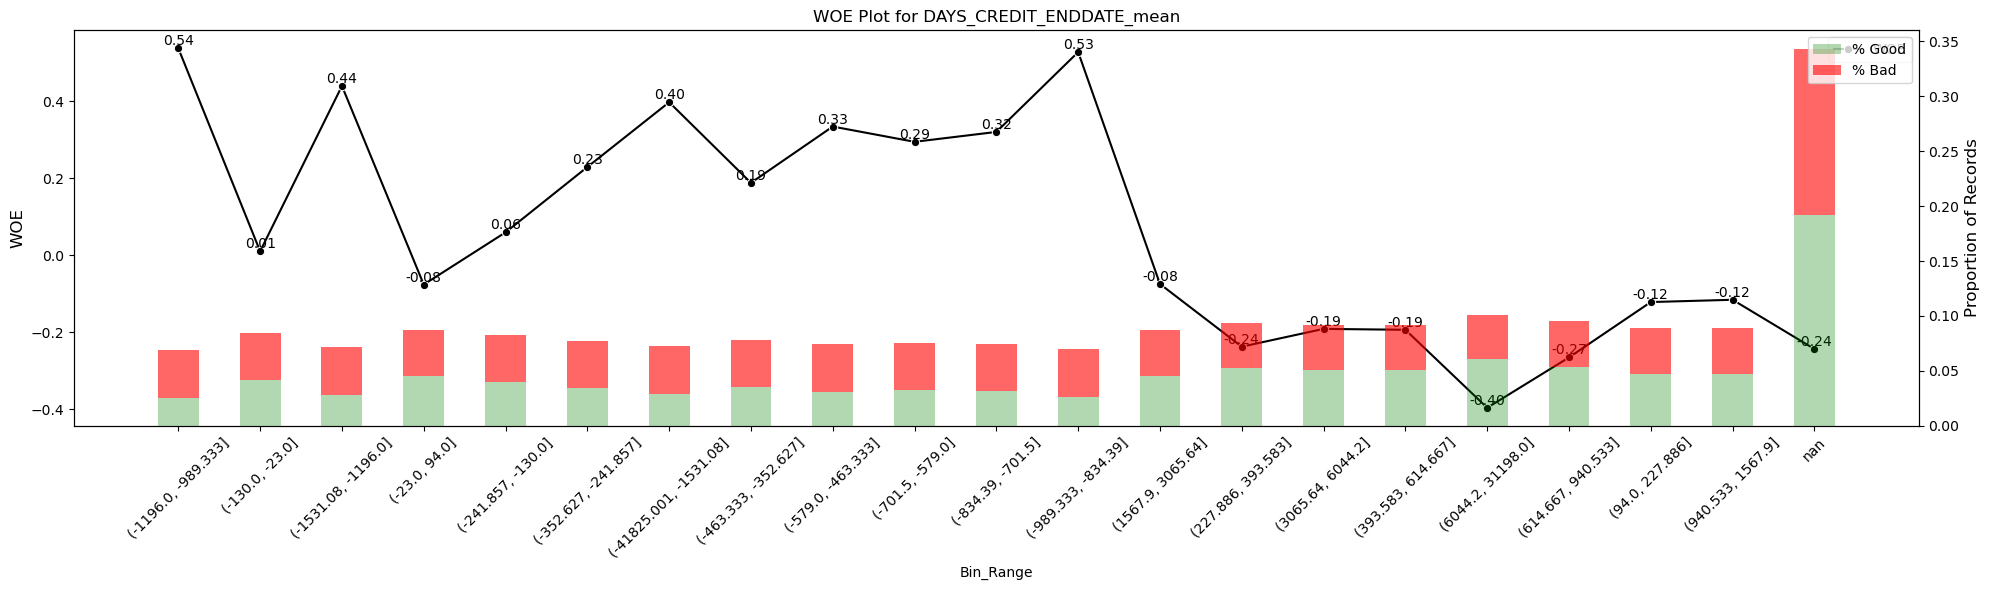


IV for DAYS_CREDIT_ENDDATE_mean with 5 bins: 0.0704
WOE values per Bin_Range:
  nan: WOE = -0.243888
  (200.0, 32000.0]: WOE = -0.217048
  (-200.0, 200.0]: WOE = -0.038531
  (-500.0, -200.0]: WOE = 0.216521
  (-41800.001, -500.0]: WOE = 0.406606
IV for DAYS_CREDIT_ENDDATE_mean with 5 bins: 0.0704


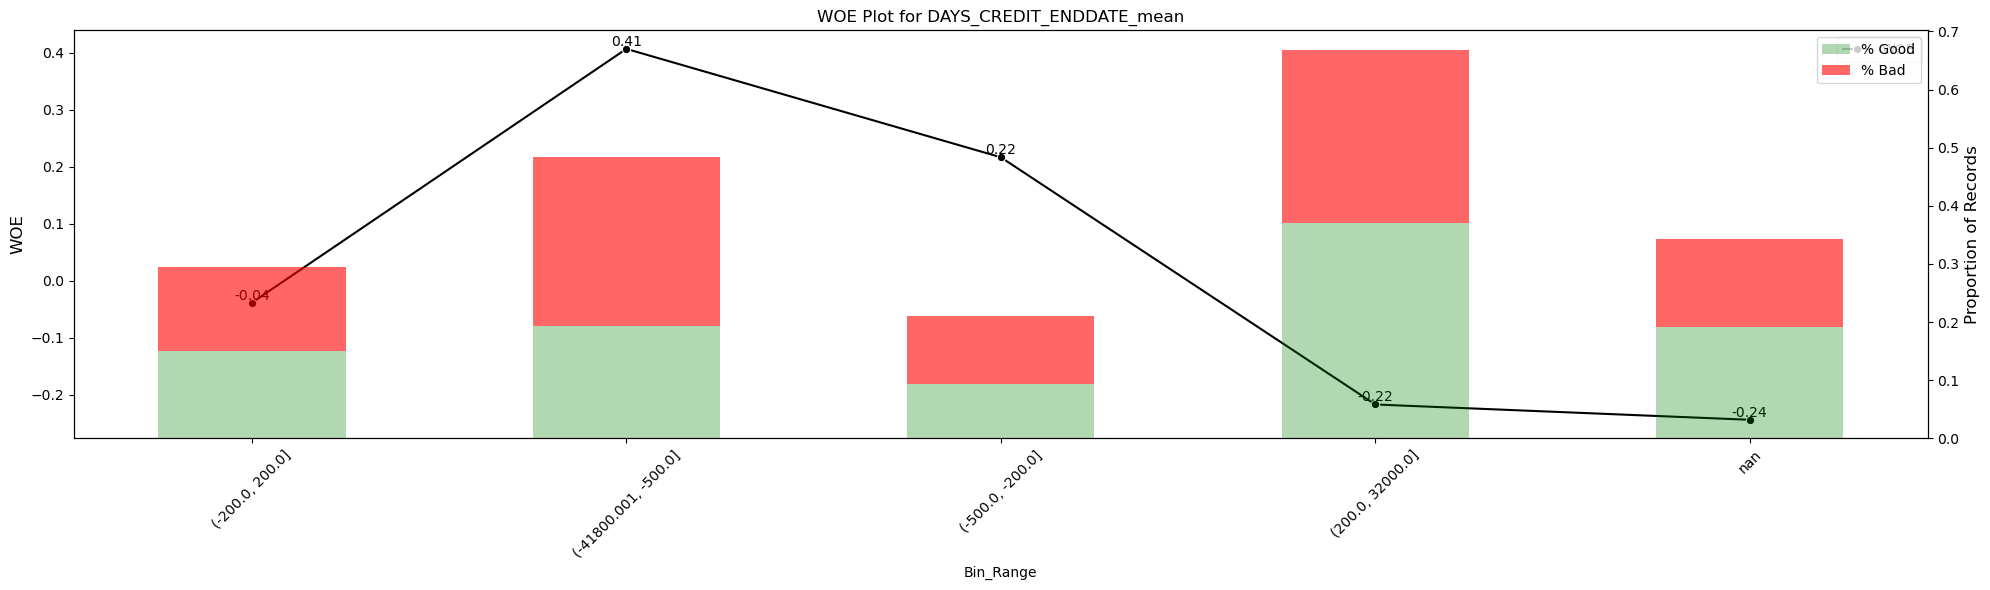

In [149]:
plot_numeric_woe(df, 'DAYS_CREDIT_ENDDATE_mean', 20)
plot_numeric_woe_manual(df, 'DAYS_CREDIT_ENDDATE_mean', [-41800,-500,-200, 200, 32000])

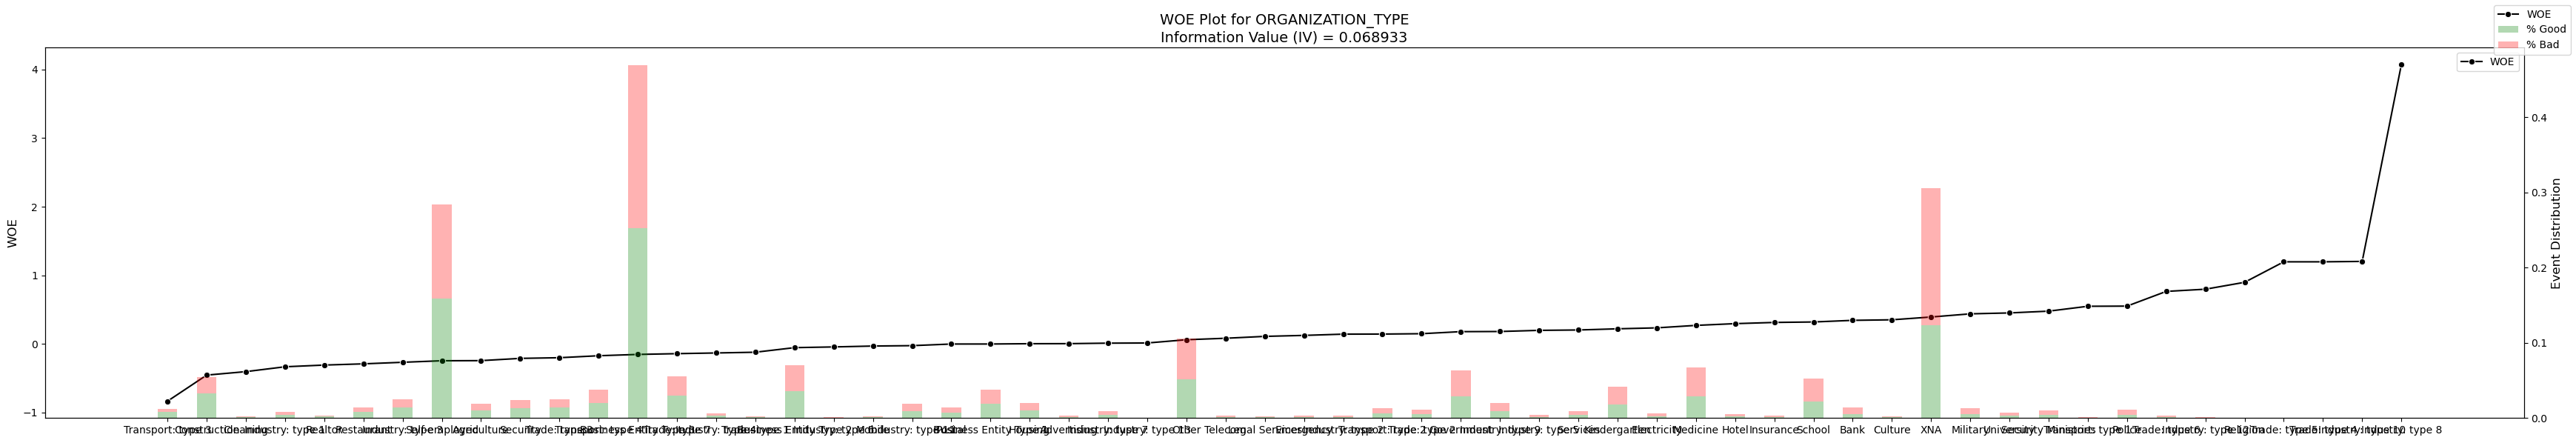

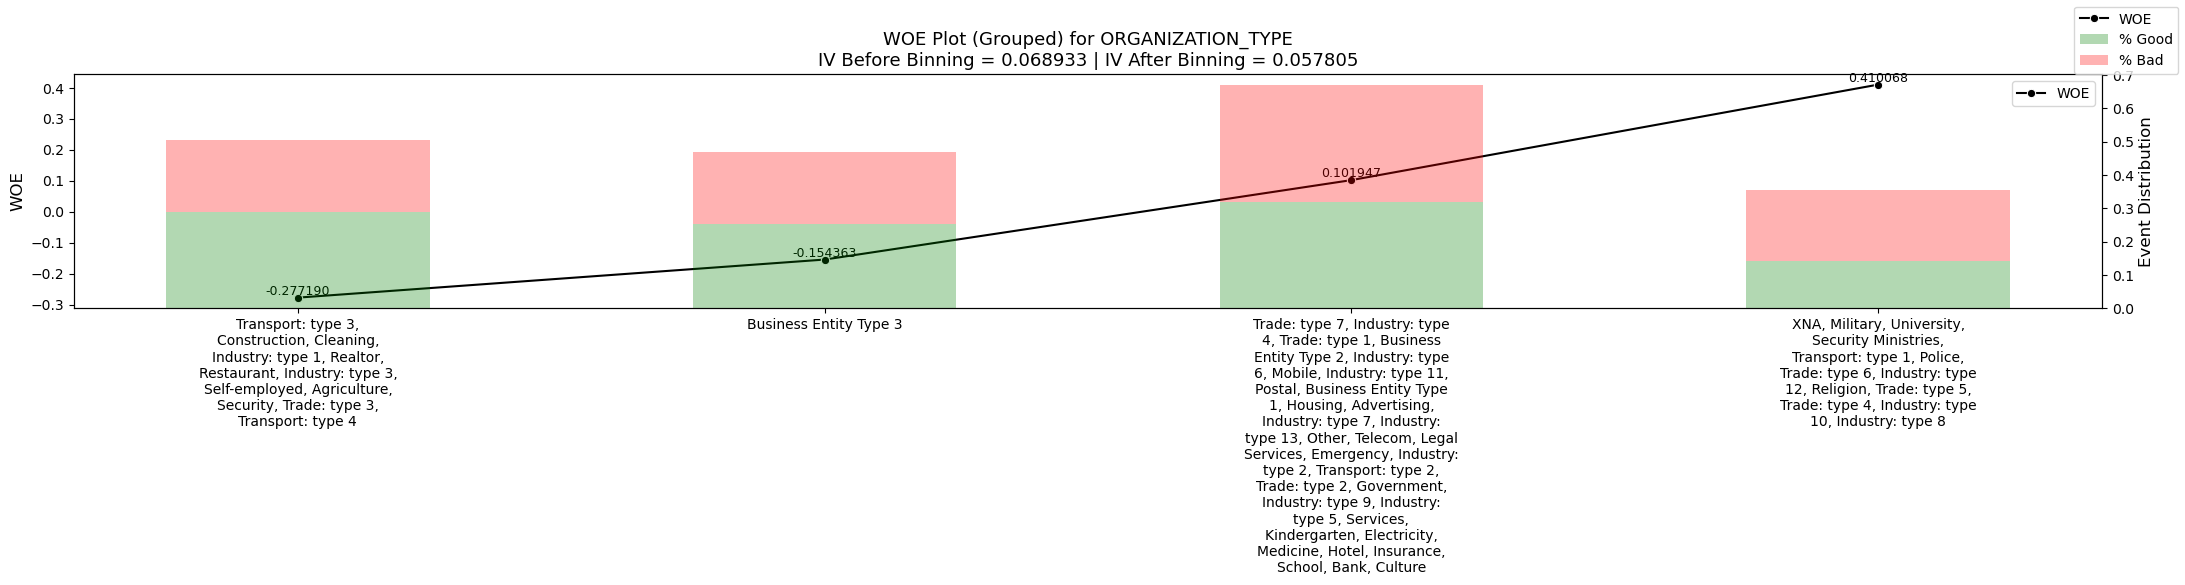


Information Value (IV) Before Binning: 0.068933
Information Value (IV) After Binning:  0.057805

WOE for each grouped bin:
Group 1:
  Categories: Transport: type 3, Construction, Cleaning, Industry: type 1, Realtor, Restaurant, Industry: type 3, Self-employed, Agriculture, Security, Trade: type 3, Transport: type 4
  WOE: -0.277190

Group 2:
  Categories: Business Entity Type 3
  WOE: -0.154363

Group 3:
  Categories: Trade: type 7, Industry: type 4, Trade: type 1, Business Entity Type 2, Industry: type 6, Mobile, Industry: type 11, Postal, Business Entity Type 1, Housing, Advertising, Industry: type 7, Industry: type 13, Other, Telecom, Legal Services, Emergency, Industry: type 2, Transport: type 2, Trade: type 2, Government, Industry: type 9, Industry: type 5, Services, Kindergarten, Electricity, Medicine, Hotel, Insurance, School, Bank, Culture
  WOE: 0.101947

Group 4:
  Categories: XNA, Military, University, Security Ministries, Transport: type 1, Police, Trade: type 6, Industry:

In [27]:
woe_iv_plot_categorical(df, "ORGANIZATION_TYPE", target_name='TARGET')
woe_iv_plot_categorical_manual(df, "ORGANIZATION_TYPE", [0,12,13,45,60], target_name='TARGET')

IV for AMT_CREDIT_SUM_DEBT_mean with 17 bins: 0.0541


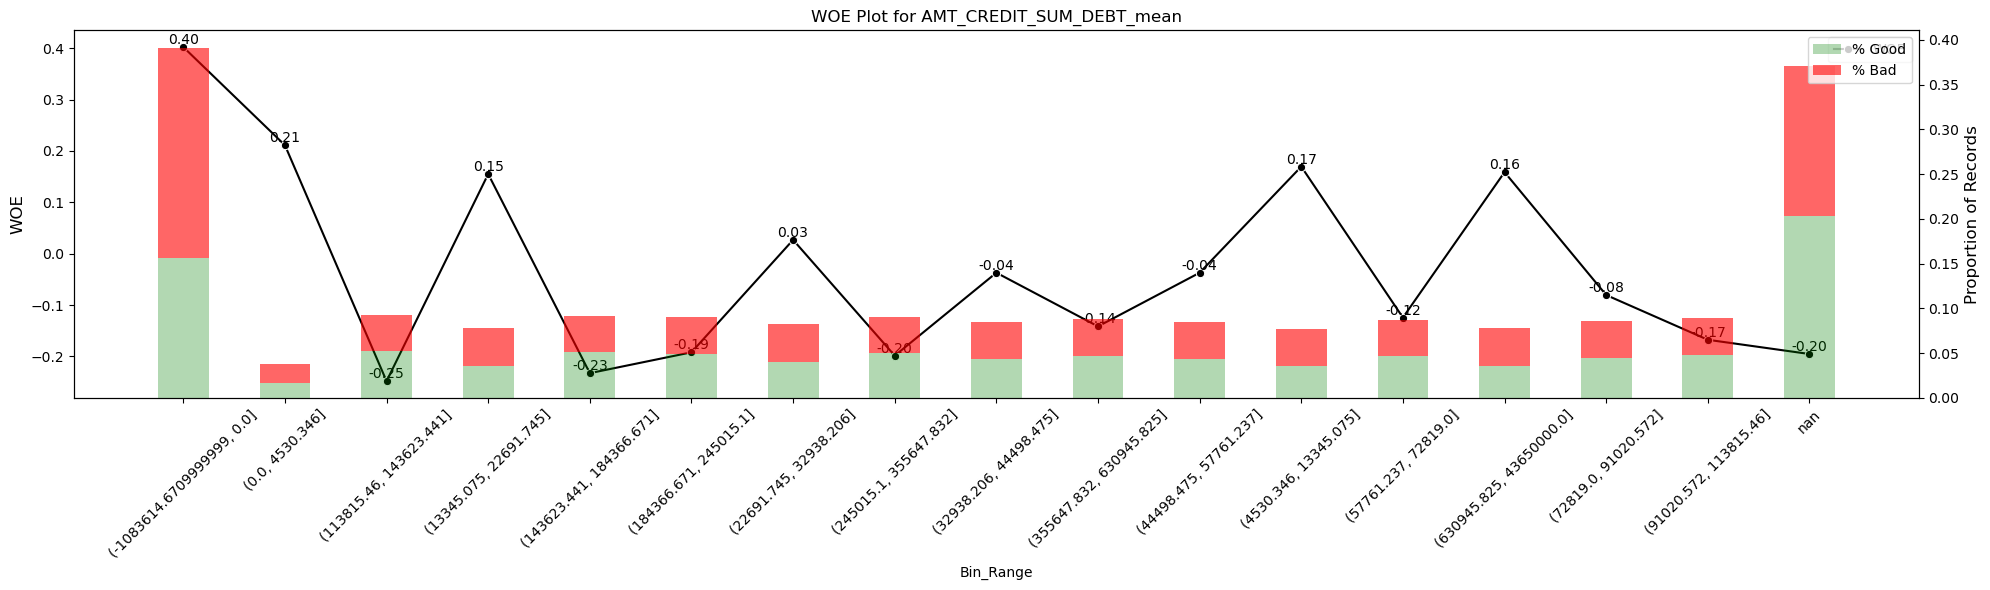


IV for AMT_CREDIT_SUM_DEBT_mean with 3 bins: 0.0436
WOE values per Bin_Range:
  nan: WOE = -0.167258
  (2000.0, 120000.0]: WOE = -0.016294
  (-2000000.001, 2000.0]: WOE = 0.393519
IV for AMT_CREDIT_SUM_DEBT_mean with 3 bins: 0.0436


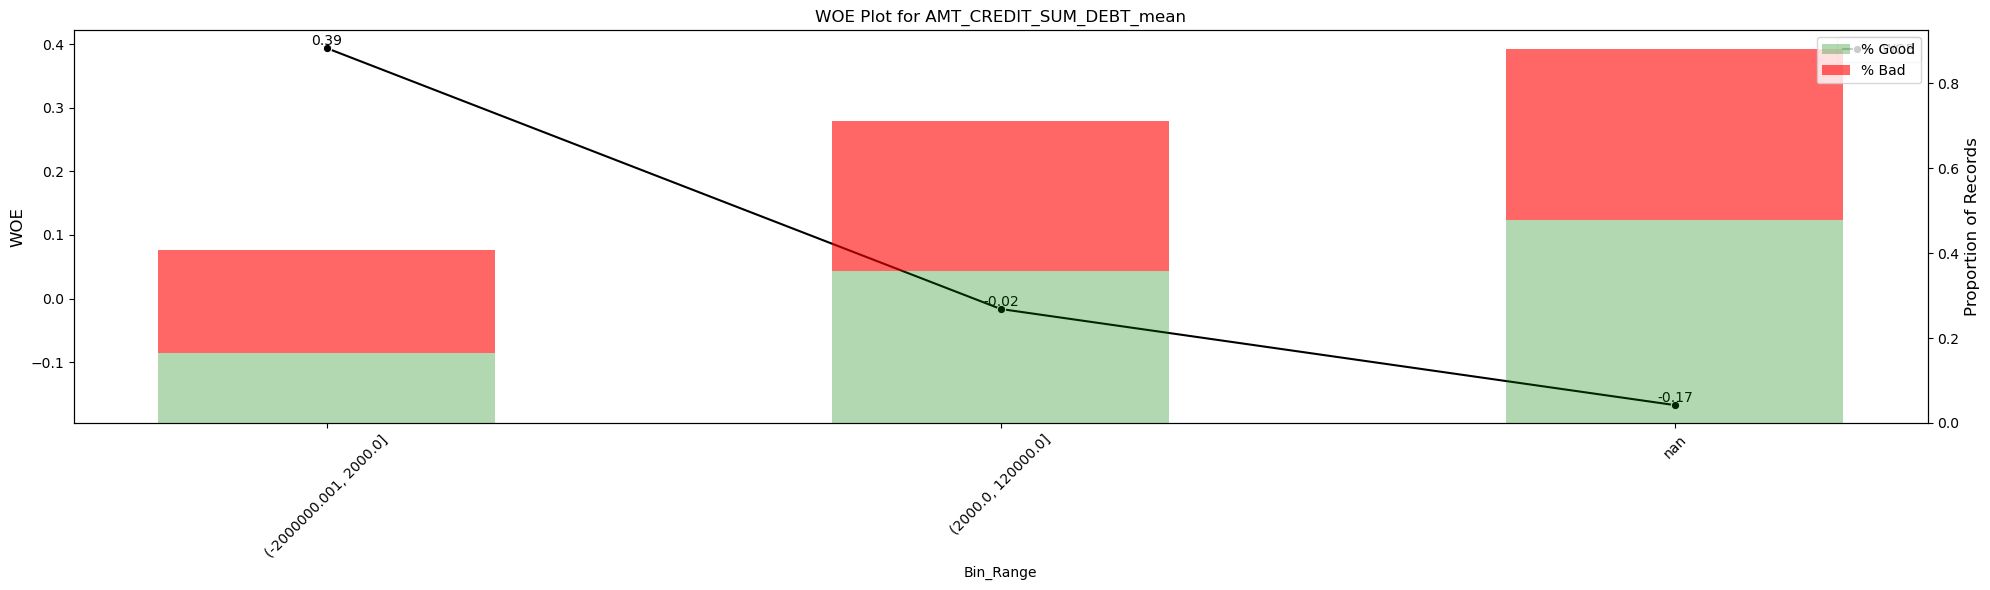

In [40]:
plot_numeric_woe(df, 'AMT_CREDIT_SUM_DEBT_mean', 20)
plot_numeric_woe_manual(df, 'AMT_CREDIT_SUM_DEBT_mean', [-2000000,2000, 120000])
# why are the ranges so weird? what does this even mean

IV for CREDIT_ACTIVE_Active with 7 bins: 0.0536


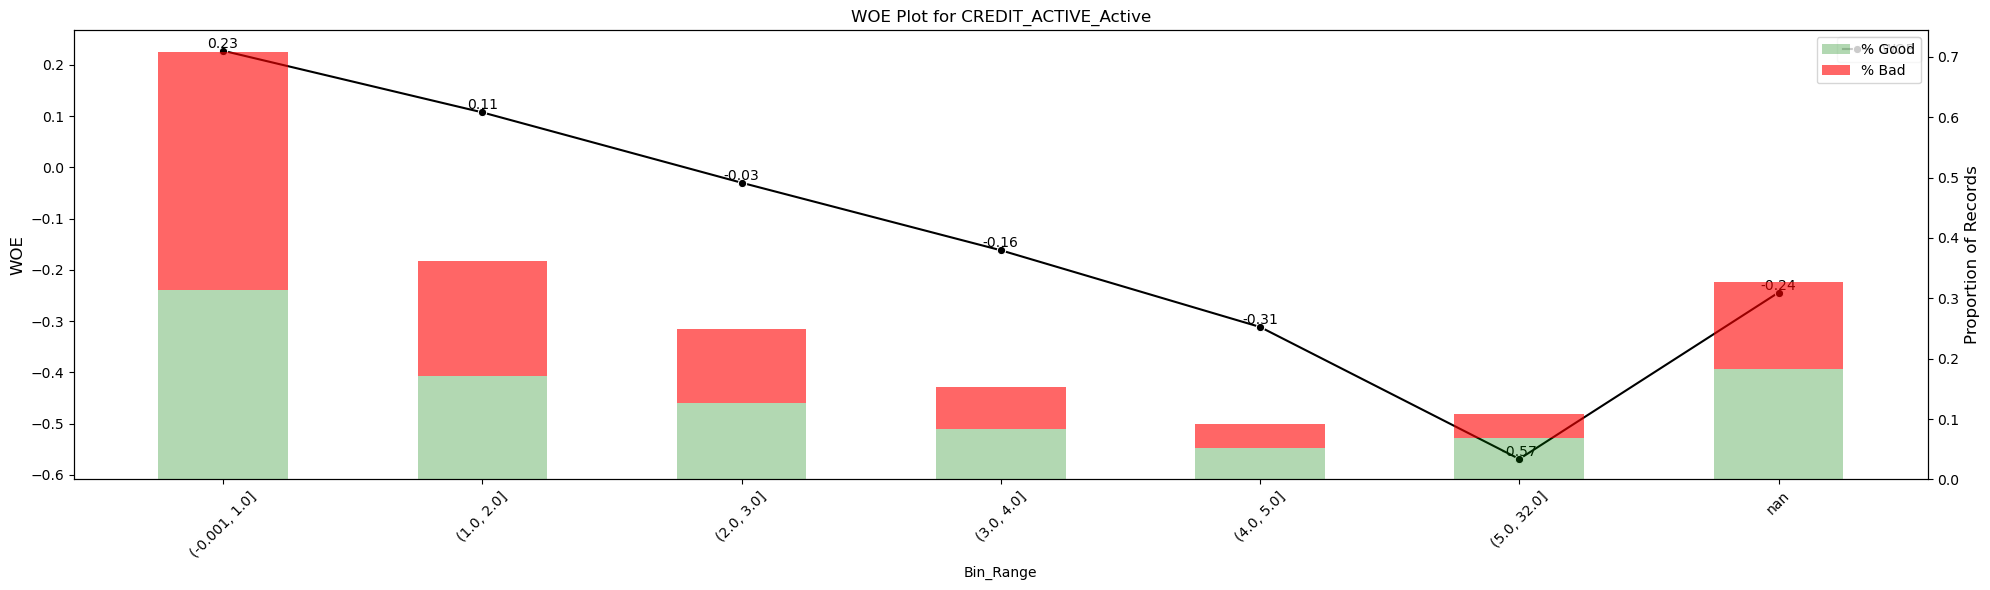


IV for CREDIT_ACTIVE_Active with 4 bins: 0.0469
WOE values per Bin_Range:
  (3.0, 32.0]: WOE = -0.322140
  nan: WOE = -0.244067
  (1.0, 3.0]: WOE = 0.051390
  (-0.001, 1.0]: WOE = 0.227726
IV for CREDIT_ACTIVE_Active with 4 bins: 0.0469


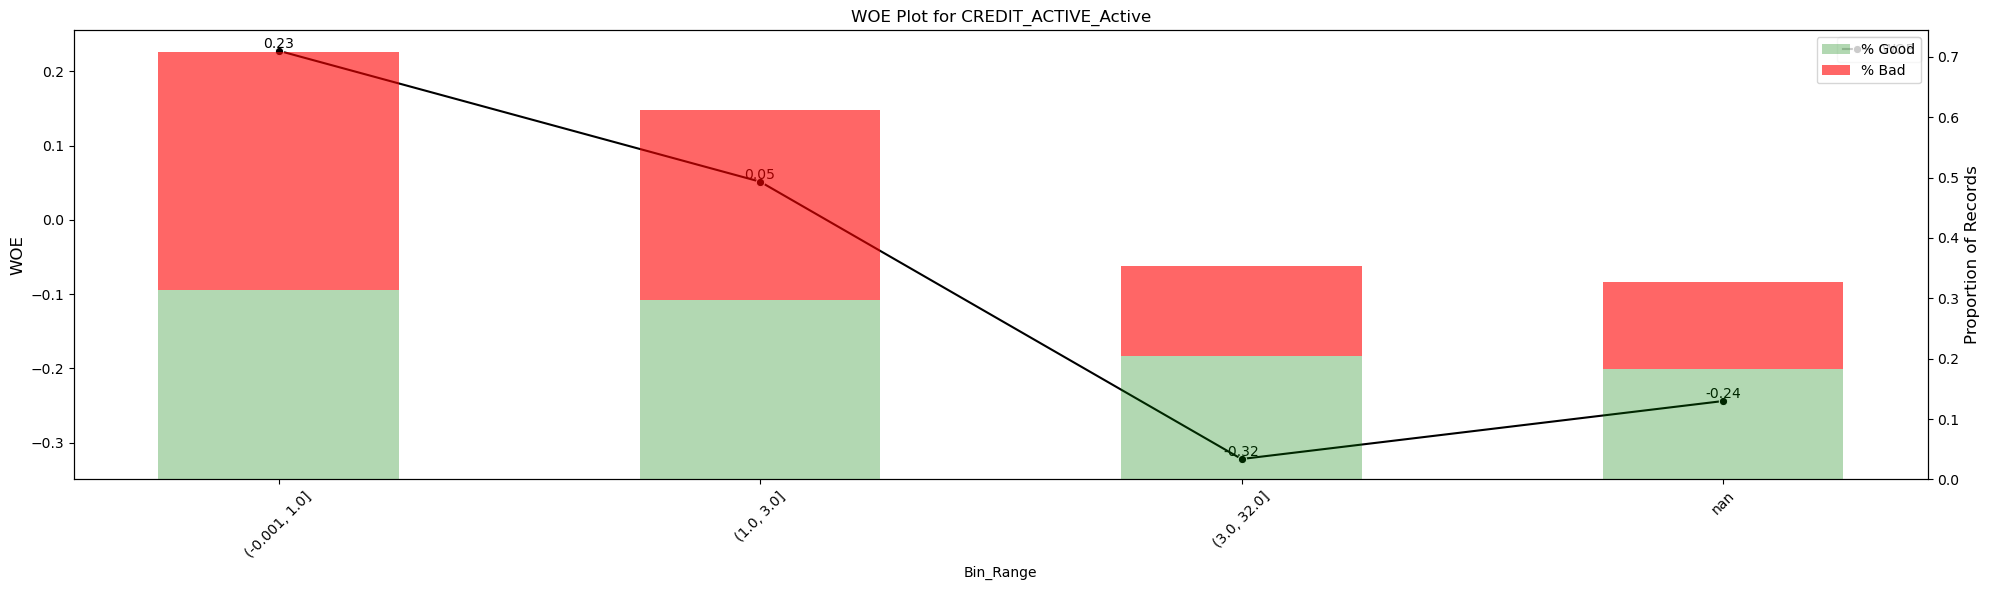

In [68]:
# df.info()
plot_numeric_woe(df, 'CREDIT_ACTIVE_Active', 20)
plot_numeric_woe_manual(df, 'CREDIT_ACTIVE_Active', [0,1,3,32])

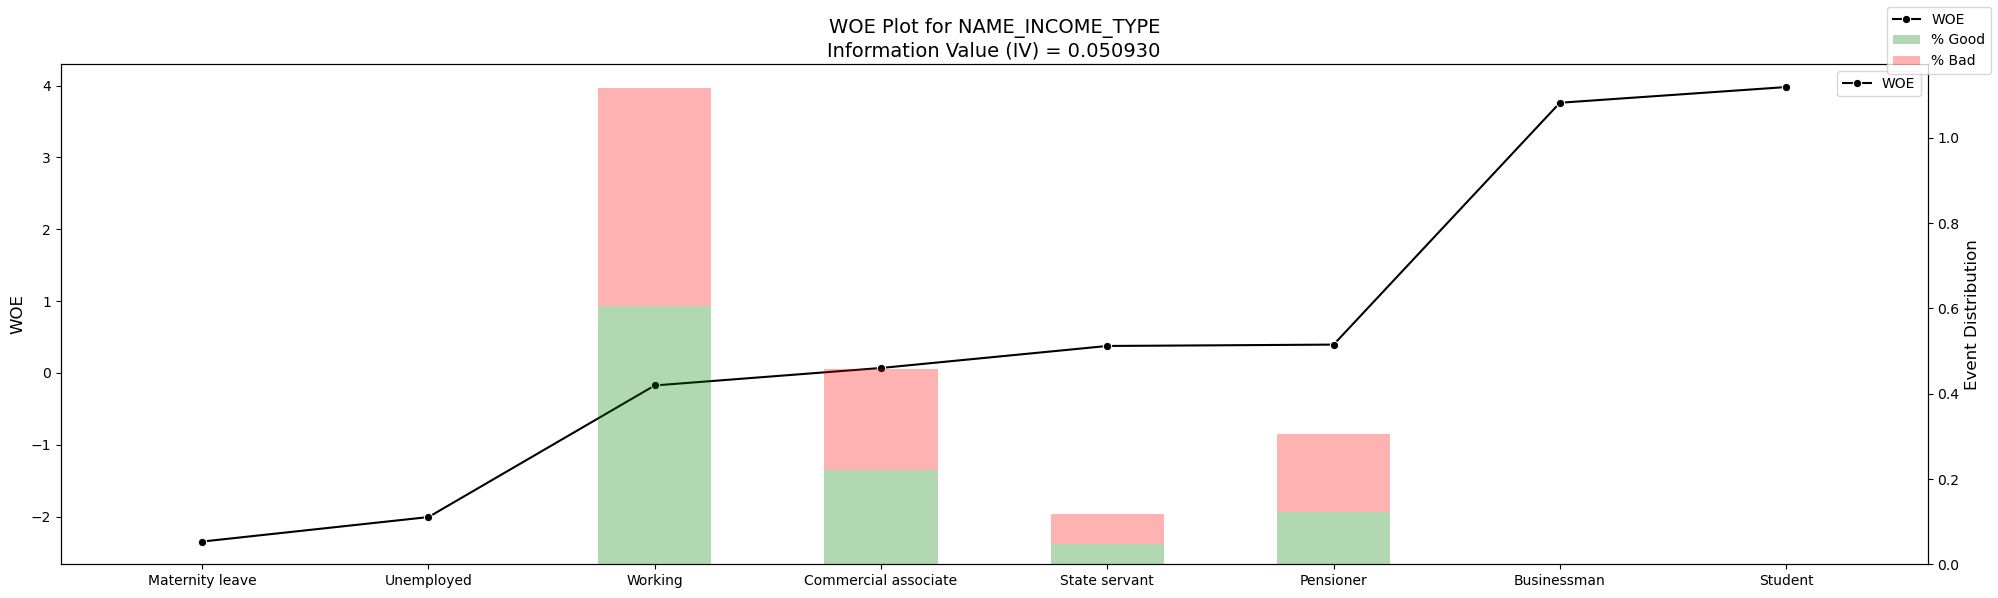

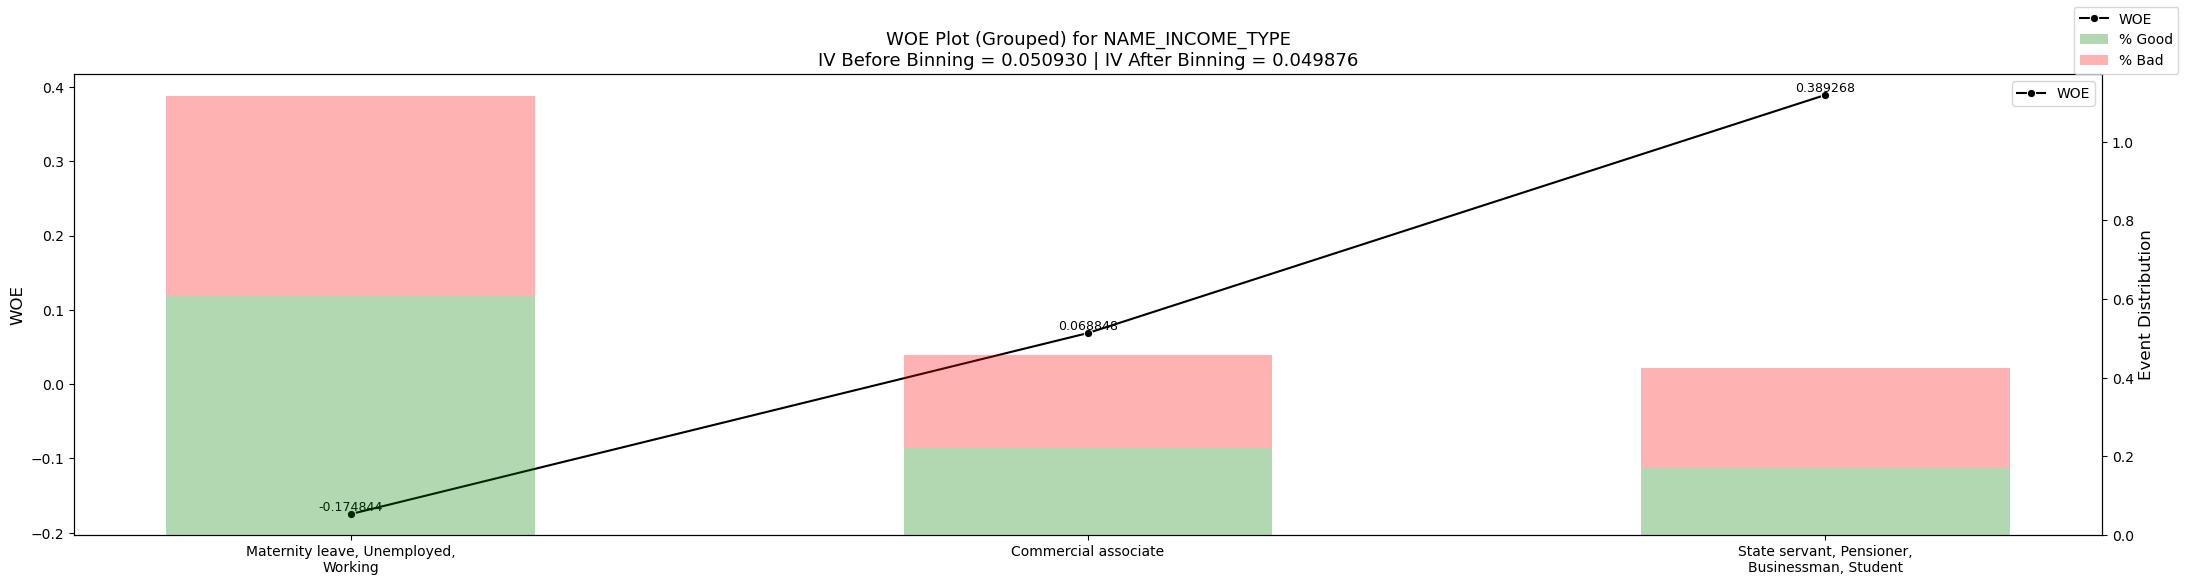


Information Value (IV) Before Binning: 0.050930
Information Value (IV) After Binning:  0.049876

WOE for each grouped bin:
Group 1:
  Categories: Maternity leave, Unemployed, Working
  WOE: -0.174844

Group 2:
  Categories: Commercial associate
  WOE: 0.068848

Group 3:
  Categories: State servant, Pensioner, Businessman, Student
  WOE: 0.389268



In [70]:
woe_iv_plot_categorical(df, "NAME_INCOME_TYPE", target_name='TARGET')
woe_iv_plot_categorical_manual(df, "NAME_INCOME_TYPE", [0,3,4,8], target_name='TARGET')

IV for DAYS_LAST_PHONE_CHANGE with 19 bins: 0.0486


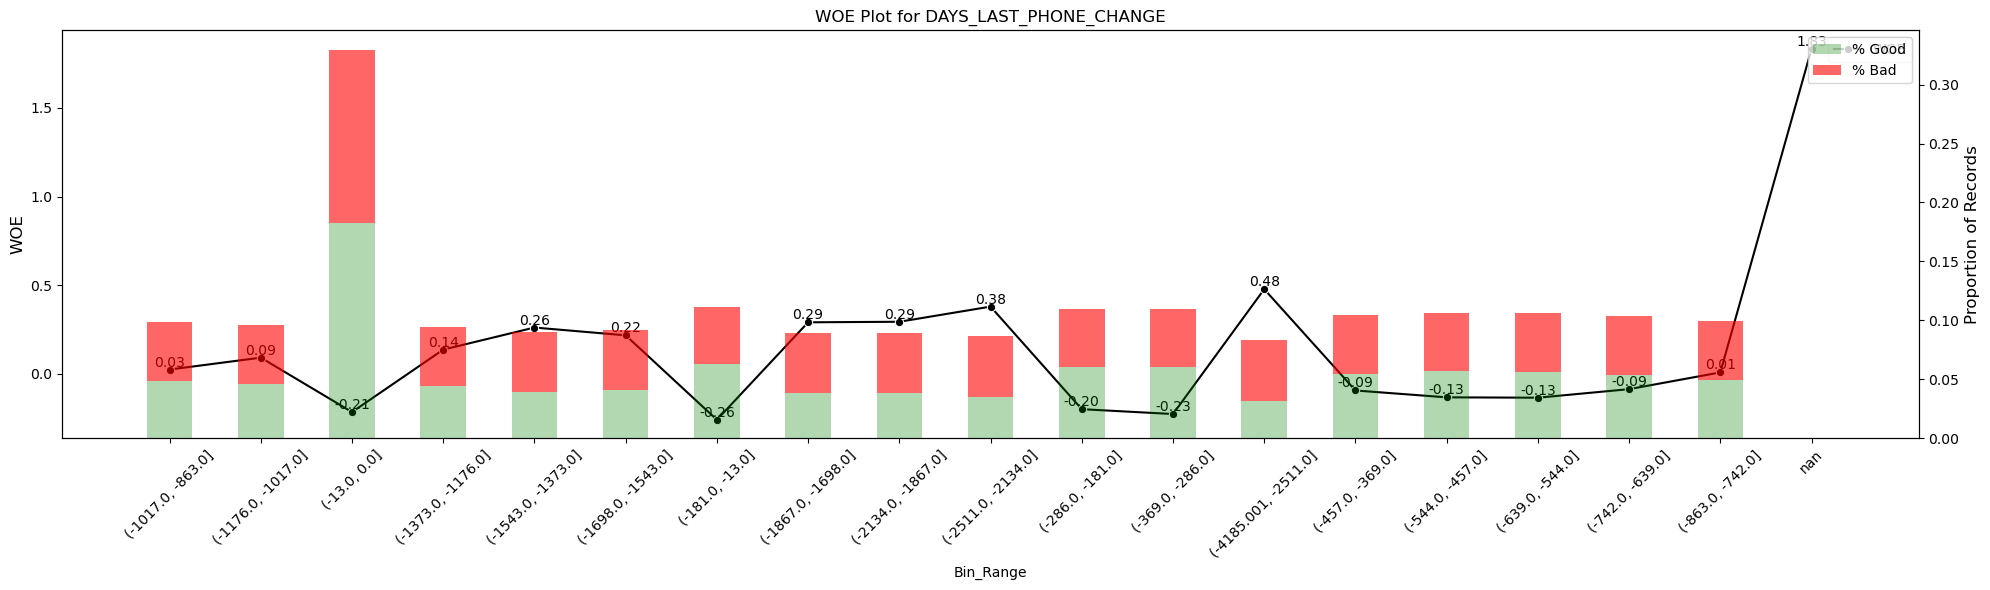


IV for DAYS_LAST_PHONE_CHANGE with 5 bins: 0.0461
WOE values per Bin_Range:
  nan: WOE = -0.209904
  (-750.0, -10.0]: WOE = -0.162374
  (-1400.0, -750.0]: WOE = 0.067069
  (-2100.0, -1400.0]: WOE = 0.265044
  (-4200.001, -2100.0]: WOE = 0.429716
IV for DAYS_LAST_PHONE_CHANGE with 5 bins: 0.0461


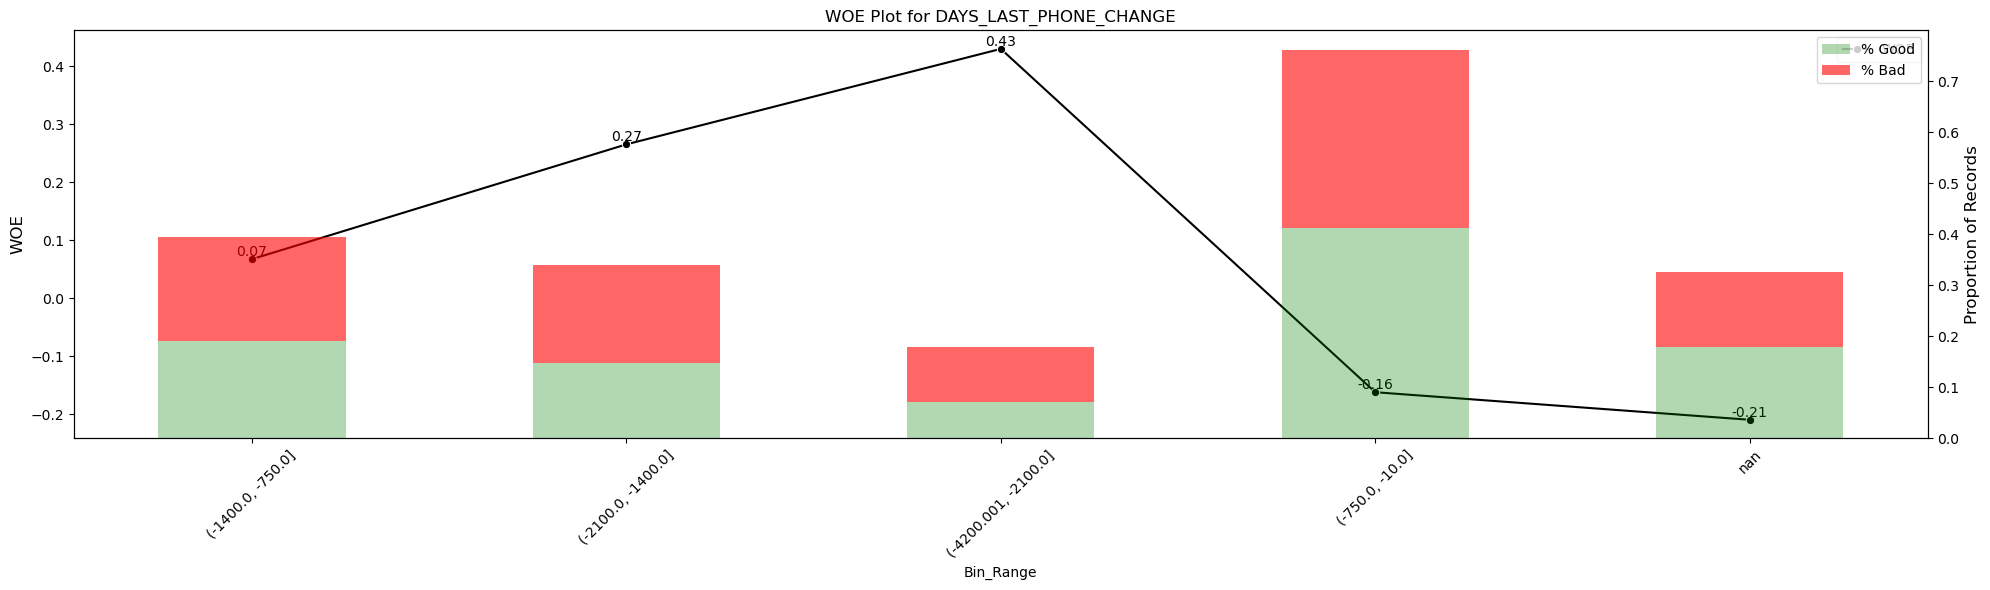

In [69]:
plot_numeric_woe(df, 'DAYS_LAST_PHONE_CHANGE', 20)
plot_numeric_woe_manual(df, 'DAYS_LAST_PHONE_CHANGE', [-4200,-2100, -1400, -750, -10])

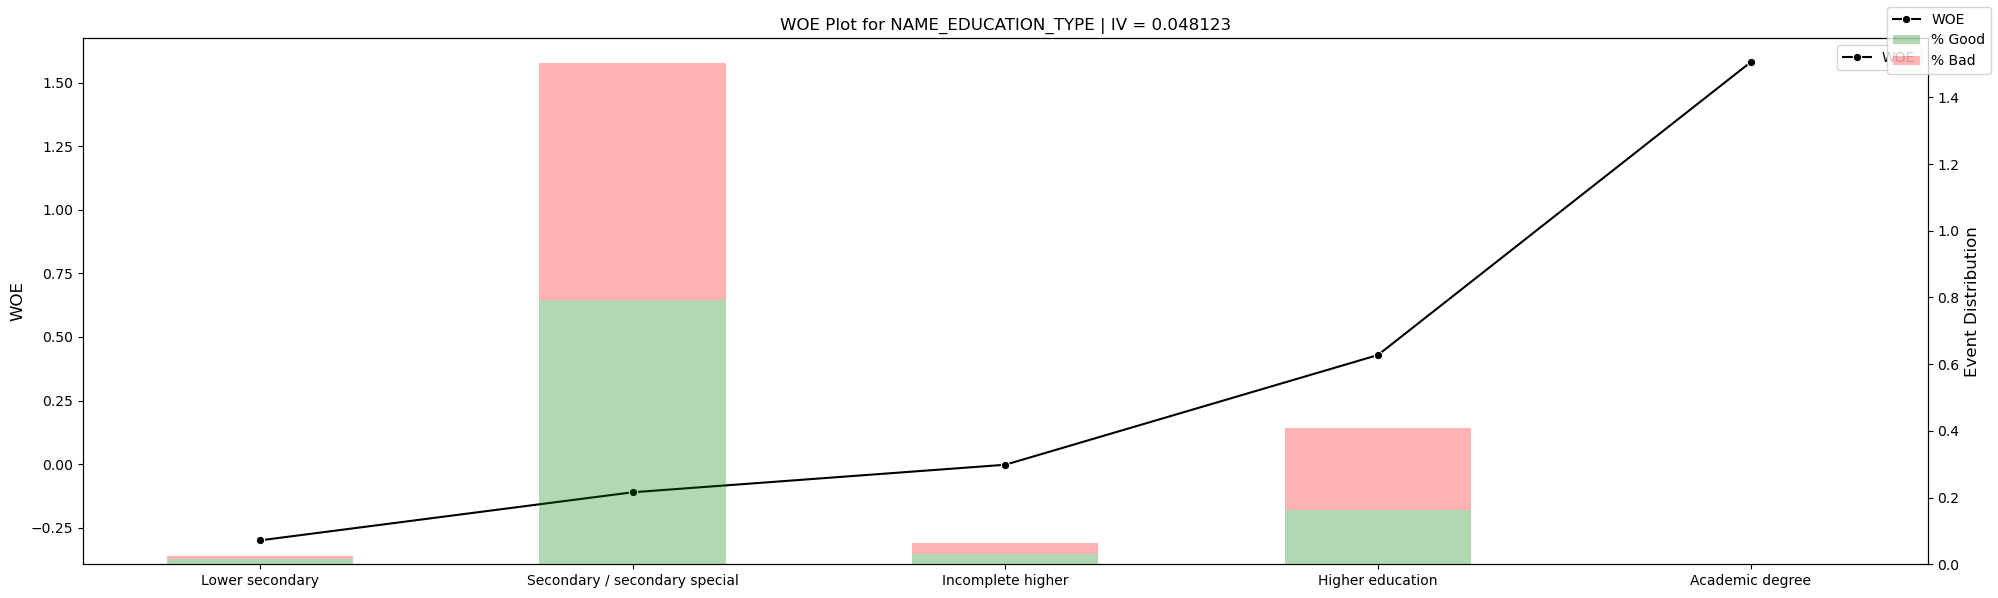

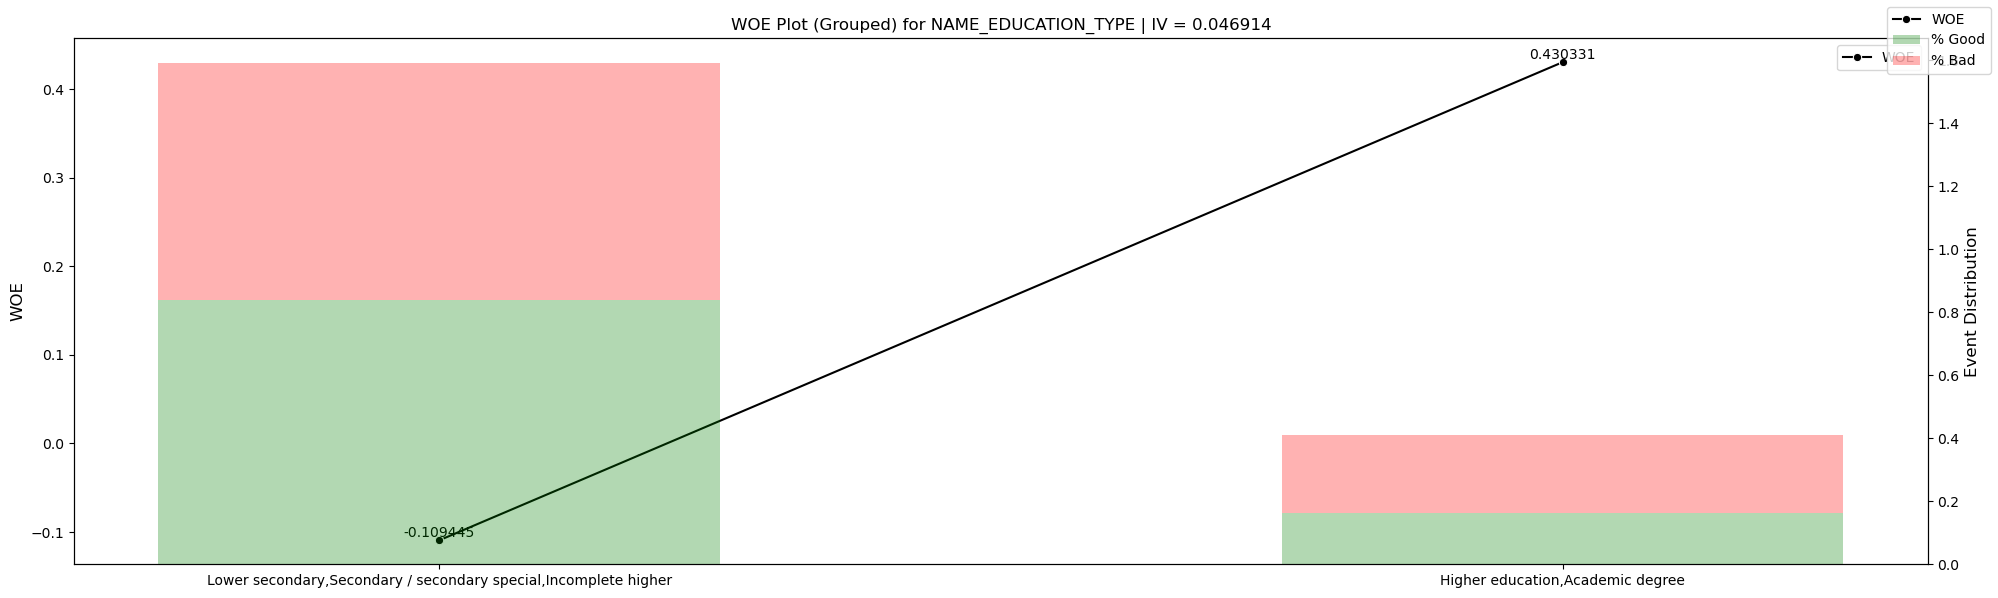

In [163]:
woe_iv_plot_categorical(df, "NAME_EDUCATION_TYPE", target_name='TARGET')
woe_iv_plot_categorical_manual(df, "NAME_EDUCATION_TYPE", [0,3,5], target_name='TARGET')

IV for AMT_CREDIT_SUM_DEBT_sum with 17 bins: 0.0479


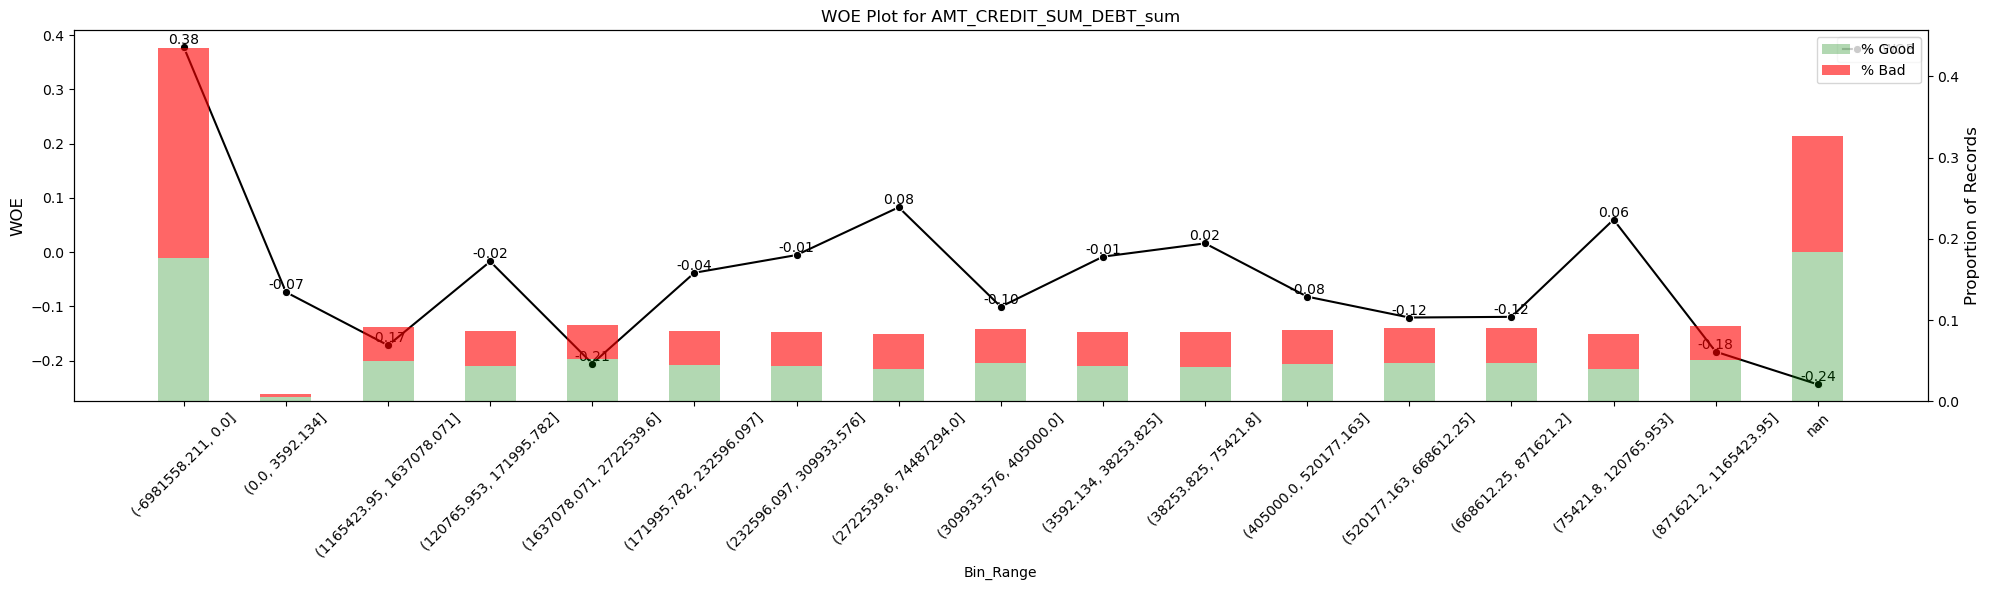


IV for AMT_CREDIT_SUM_DEBT_sum with 4 bins: 0.0437
WOE values per Bin_Range:
  nan: WOE = -0.181634
  (300000.0, 1200000.0]: WOE = -0.120005
  (0.0, 300000.0]: WOE = -0.000157
  (-70000000.001, 0.0]: WOE = 0.378028
IV for AMT_CREDIT_SUM_DEBT_sum with 4 bins: 0.0437


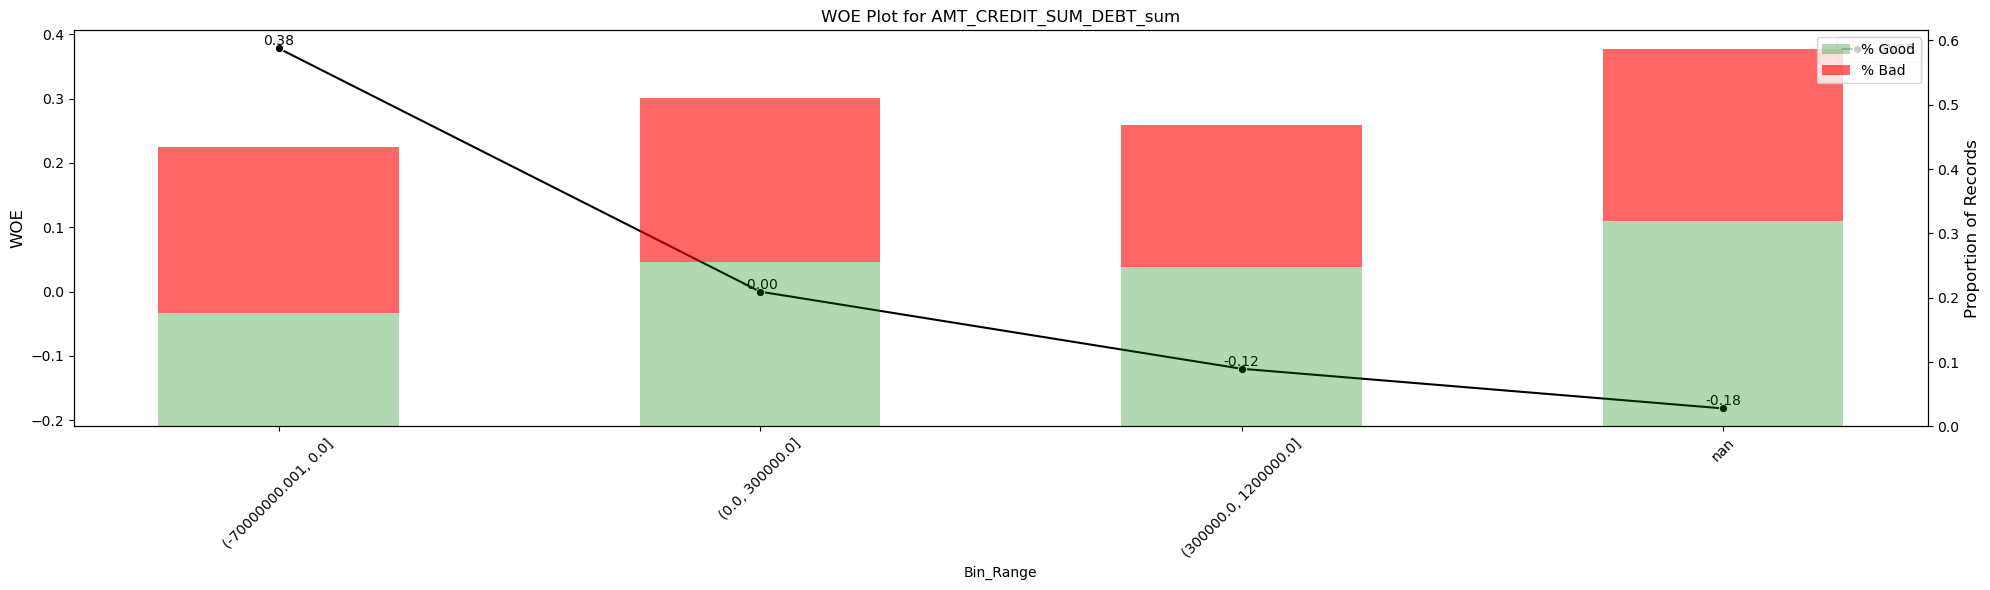

In [39]:

plot_numeric_woe(df, 'AMT_CREDIT_SUM_DEBT_sum', 20)
plot_numeric_woe_manual(df, 'AMT_CREDIT_SUM_DEBT_sum', [-70000000, 0, 300000, 1200000])

IV for REGION_POPULATION_RELATIVE with 20 bins: 0.0402


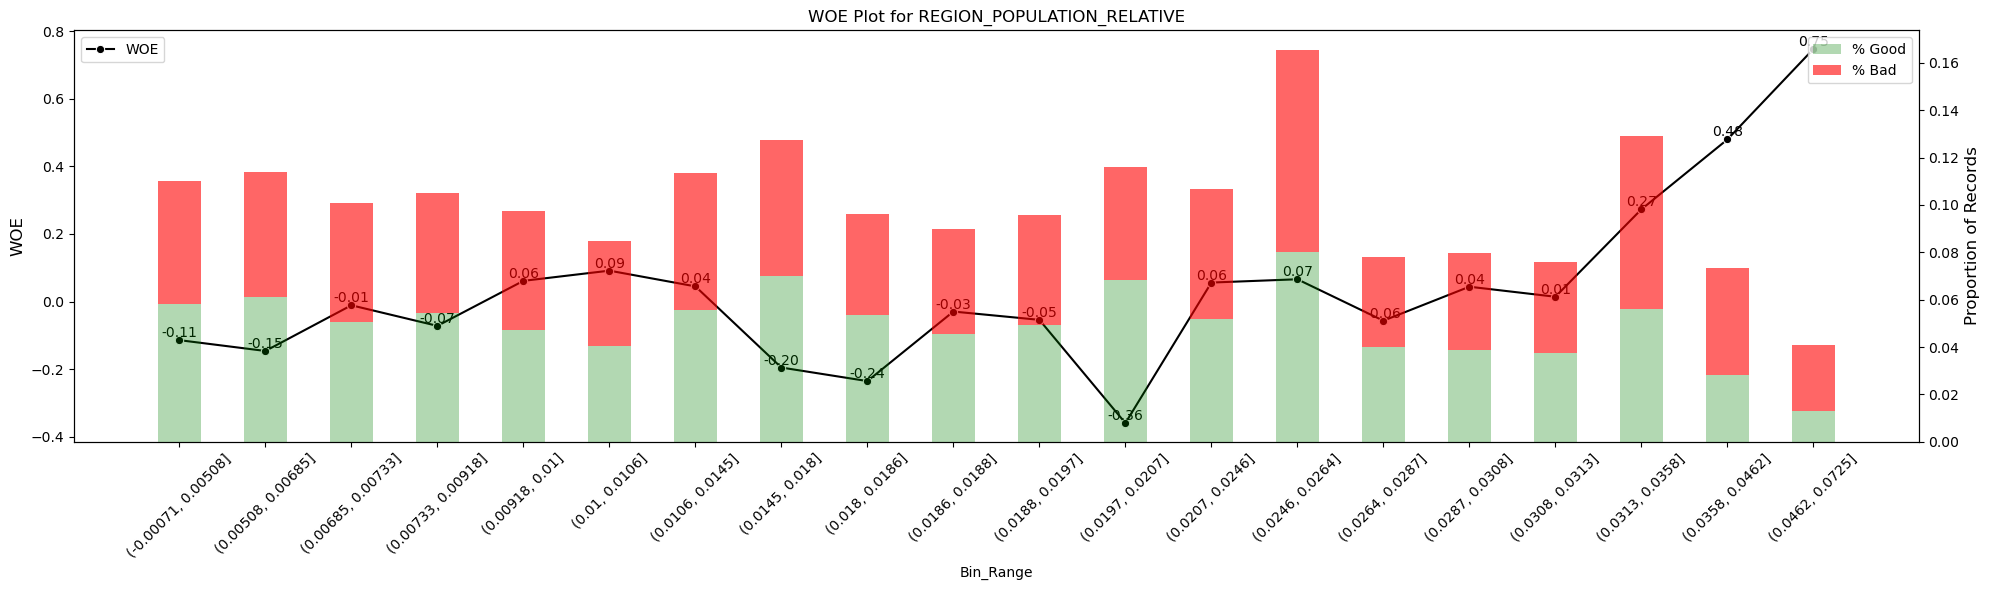


IV for REGION_POPULATION_RELATIVE with 3 bins: 0.0124
WOE values per Bin_Range:
  (-1.001, 0.01]: WOE = -0.079248
  (0.01, 0.05]: WOE = 0.006279
  (0.05, 1.0]: WOE = 0.747108
IV for REGION_POPULATION_RELATIVE with 3 bins: 0.0124


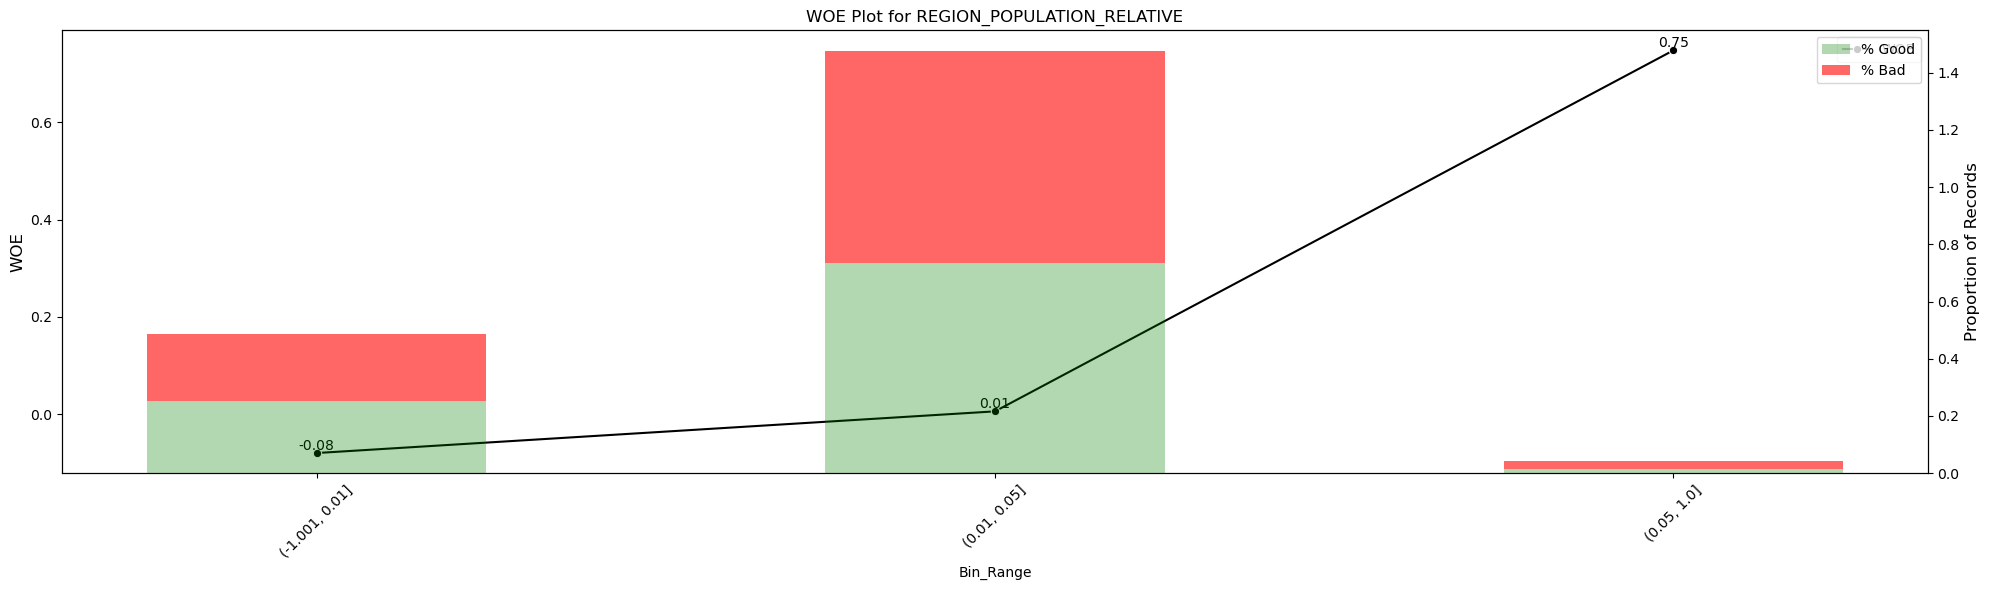

In [84]:
plot_numeric_woe(df, 'REGION_POPULATION_RELATIVE', 20)
plot_numeric_woe_manual(df, 'REGION_POPULATION_RELATIVE', [-1, 0.01, 0.05 ,1])

IV for FLOORSMAX_AVG with 10 bins: 0.0391


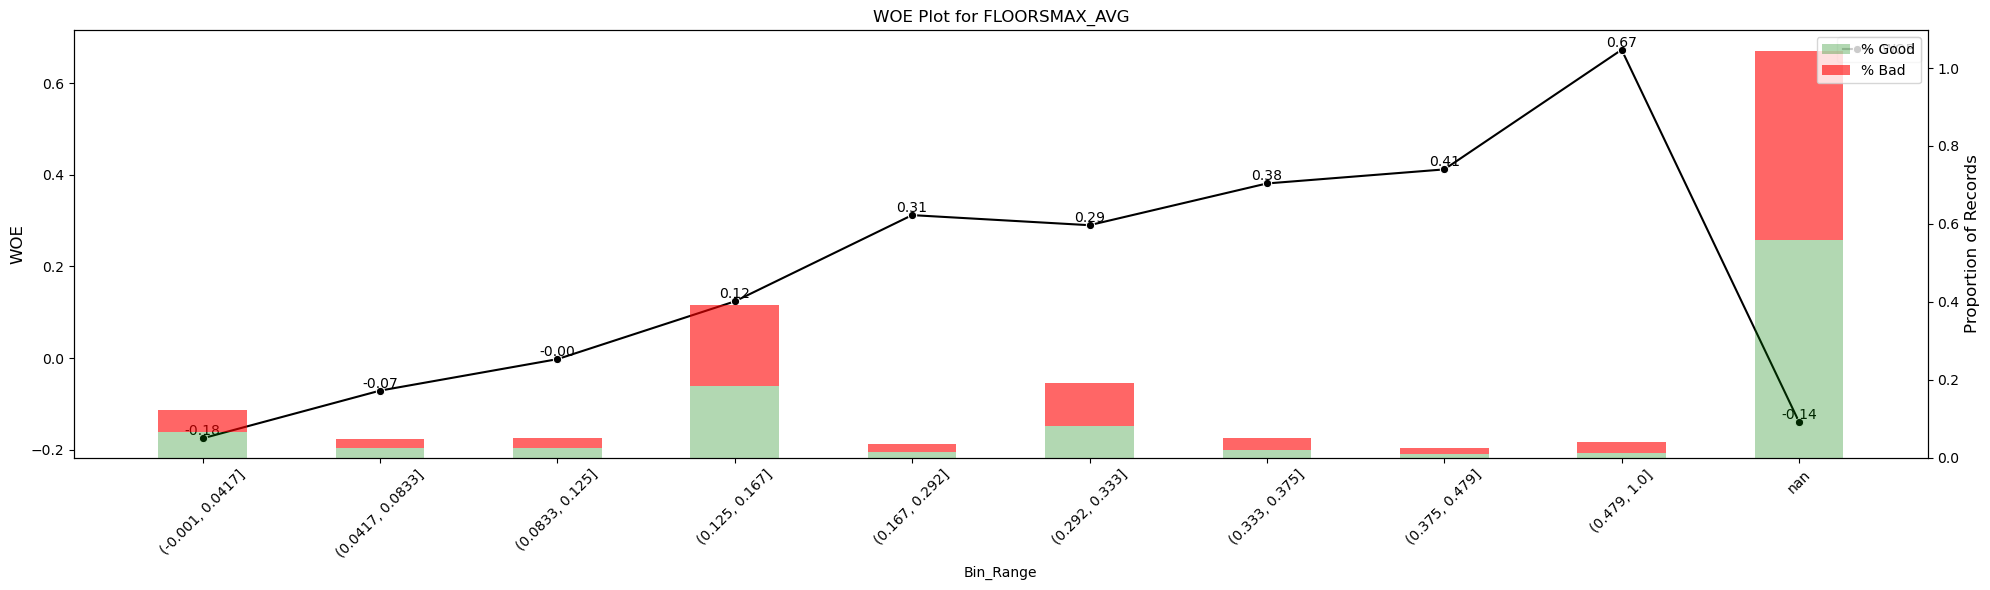


IV for FLOORSMAX_AVG with 4 bins: 0.0356
WOE values per Bin_Range:
  nan: WOE = -0.139012
  (-0.001, 0.15]: WOE = -0.111242
  (0.15, 0.3]: WOE = 0.140622
  (0.3, 1.0]: WOE = 0.362637
IV for FLOORSMAX_AVG with 4 bins: 0.0356


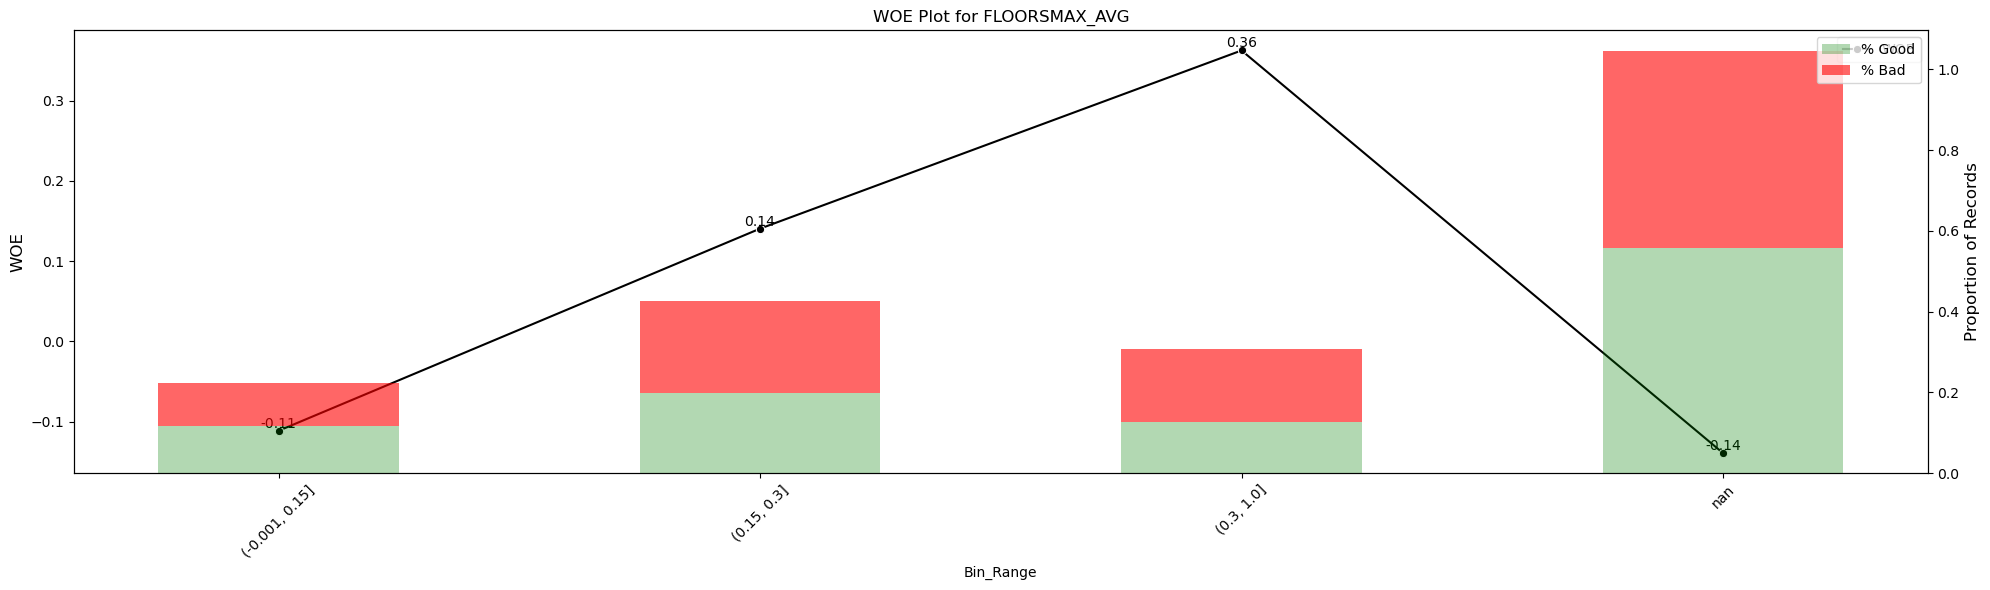

In [80]:
plot_numeric_woe(df, 'FLOORSMAX_AVG', 20)
plot_numeric_woe_manual(df, 'FLOORSMAX_AVG', [0, 0.15, 0.3, 1])

IV for DAYS_ID_PUBLISH with 20 bins: 0.0379


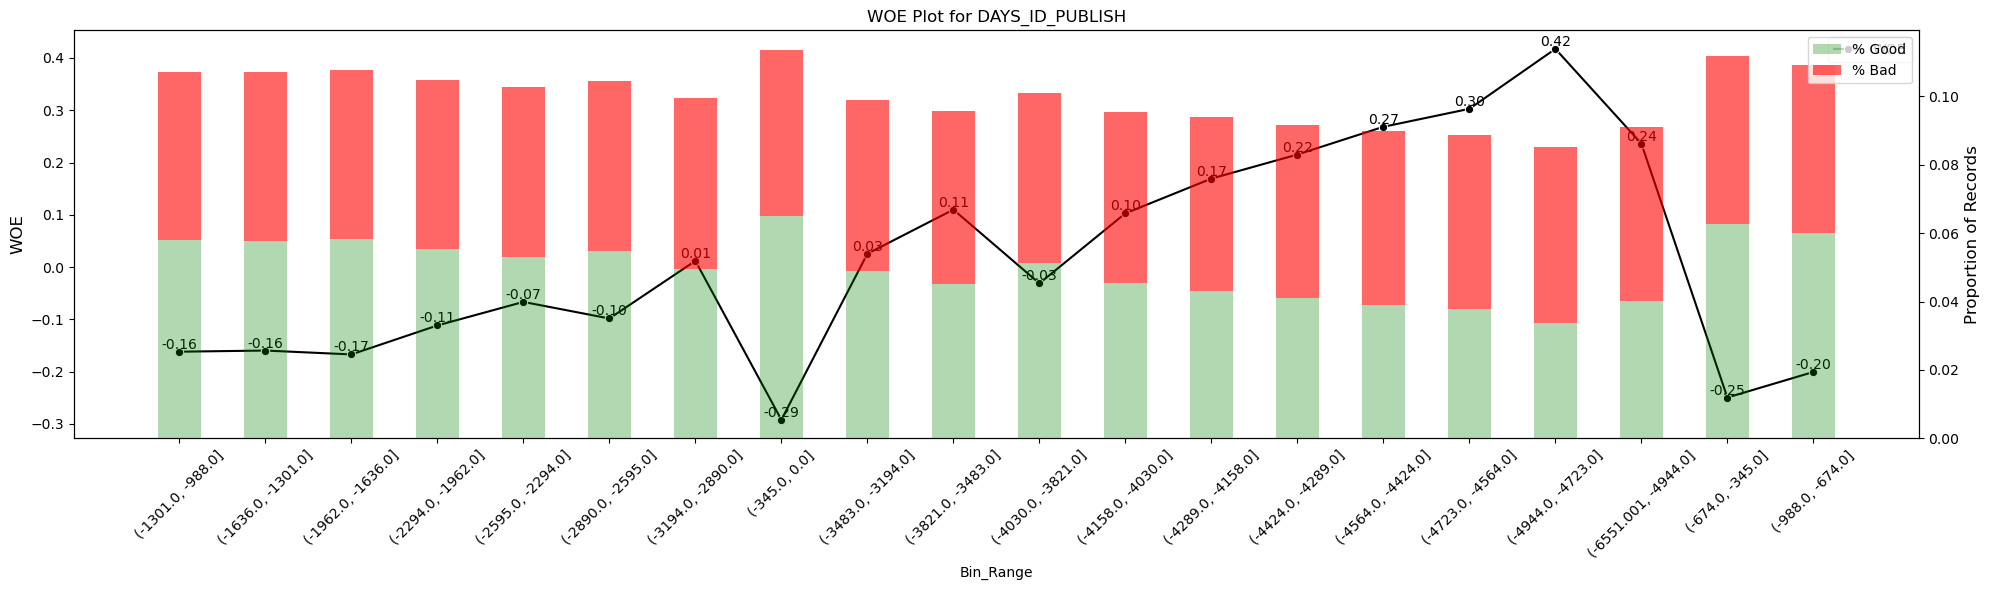


IV for DAYS_ID_PUBLISH with 4 bins: 0.0326
WOE values per Bin_Range:
  (-2000.0, 0.0]: WOE = -0.200515
  (-3000.0, -2000.0]: WOE = -0.091631
  (-4000.0, -3000.0]: WOE = 0.038013
  (-6551.001, -4000.0]: WOE = 0.231393
IV for DAYS_ID_PUBLISH with 4 bins: 0.0326


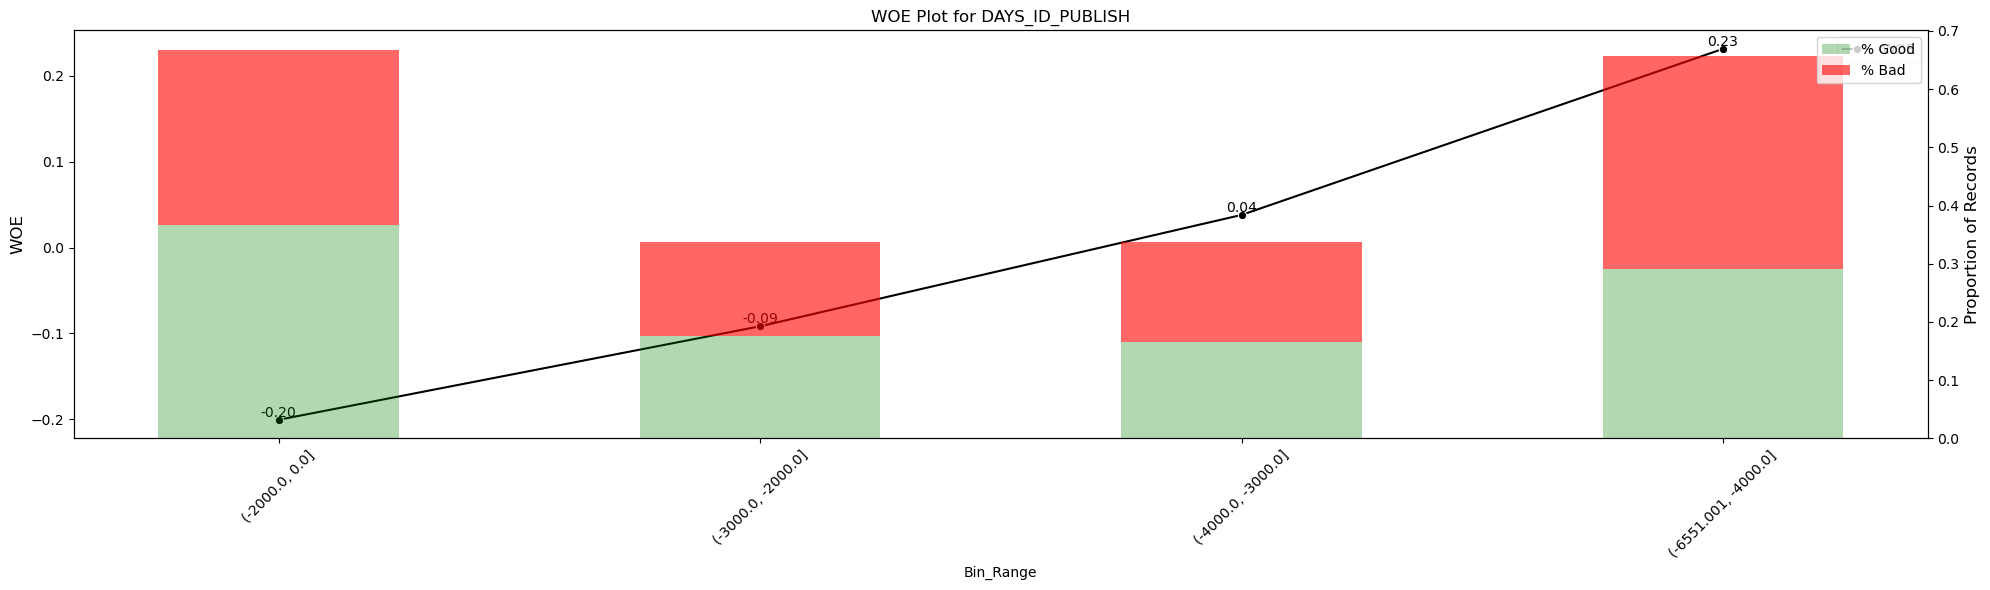

In [81]:
plot_numeric_woe(df, 'DAYS_ID_PUBLISH', 20)
plot_numeric_woe_manual(df, 'DAYS_ID_PUBLISH', [-6551,  -4000, -3000, -2000, 0])

In [53]:
# drop unwatned variables and save new df as after_coarse_classing
cols_to_drop = [
    'REGION_POPULATION_RELATIVE',
    'DAYS_LAST_PHONE_CHANGE',
    'DAYS_CREDIT_ENDDATE_mean'
]

df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
df.info()
df.to_csv('after_coarse_classing.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TARGET                    207300 non-null  int64  
 1   NAME_INCOME_TYPE          207300 non-null  object 
 2   NAME_EDUCATION_TYPE       207300 non-null  object 
 3   DAYS_ID_PUBLISH           207300 non-null  int64  
 4   OCCUPATION_TYPE           143111 non-null  object 
 5   ORGANIZATION_TYPE         207300 non-null  object 
 6   EXT_SOURCE_1              89268 non-null   float64
 7   FLOORSMAX_AVG             105336 non-null  float64
 8   RATIO_LIFE_EMPLOYED       207300 non-null  float64
 9   LOAN_TO_VALUE             207077 non-null  float64
 10  DAYS_CREDIT_min           176852 non-null  float64
 11  AMT_CREDIT_SUM_DEBT_sum   176852 non-null  float64
 12  AMT_CREDIT_SUM_DEBT_mean  172010 non-null  float64
 13  CREDIT_ACTIVE_Active      176852 non-null  f

<h1> Create Scorecard

In [54]:
def Encode_WOE_categorical(column, bin_ranges, woe_values, output_df, missing_woe_value):
    """
    Encode a categorical column into WOE using manual groupings and handle missing values.
    
    Parameters:
    - column: pandas Series (e.g. original_df['JOB'])
    - bin_ranges: list of grouped category strings (e.g., ['student,unemployed', 'working'])
    - woe_values: WOE values for each group (e.g., [-0.2, 0.4])
    - output_df: DataFrame to which the new column will be added
    - missing_woe_value: WOE value to assign to missing or unmapped values
    """
    col_name = column.name + '_woe'

    # Step 1: Build category-to-WOE mapping
    group_to_woe = {}
    for group_str, woe_val in zip(bin_ranges, woe_values):
        categories = [cat.strip() for cat in group_str.split(',')]
        for cat in categories:
            group_to_woe[cat] = float(woe_val)

    # Step 2: Map values and handle missing/unmapped
    encoded_col = column.fillna('Missing').astype(str).map(group_to_woe).fillna(float(missing_woe_value))

    # Step 3: Add to output DataFrame
    output_df[col_name] = encoded_col

In [55]:
def Encode_WOE_numerical(column, bin_edges, woe_values, output_df, missing_woe_value):
    """
    Encode a numerical column into WOE using manual bins and handle missing values.

    Parameters:
    - column: pandas Series (e.g. original_df['EXT_SOURCE_1'])
    - bin_edges: list of numeric cut points
    - woe_values: WOE values for each bin (len = len(bin_edges) - 1)
    - output_df: DataFrame to which the encoded column will be added
    - missing_woe_value: WOE value to assign to missing values
    """
    col_name = column.name + '_woe'

    # Step 1: Bin the values
    binned = pd.cut(column, bins=bin_edges, include_lowest=True)

    # Step 2: Map each bin to WOE
    bin_labels = binned.cat.categories
    if len(woe_values) != len(bin_labels):
        raise ValueError(f"Number of WOE values ({len(woe_values)}) must match number of bins ({len(bin_labels)})")

    bin_to_woe = {bin_labels[i]: float(woe_values[i]) for i in range(len(woe_values))}

    # Step 3: Map and handle missing values
    encoded_col = binned.map(bin_to_woe).astype(float).fillna(float(missing_woe_value))

    # Step 4: Add to output DataFrame
    output_df[col_name] = encoded_col

In [77]:
encoded_df = pd.DataFrame()
df = pd.read_csv('after_coarse_classing.csv')
df.info()
encoded_df['TARGET'] = df['TARGET']
encoded_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TARGET                    207300 non-null  int64  
 1   NAME_INCOME_TYPE          207300 non-null  object 
 2   NAME_EDUCATION_TYPE       207300 non-null  object 
 3   DAYS_ID_PUBLISH           207300 non-null  int64  
 4   OCCUPATION_TYPE           143111 non-null  object 
 5   ORGANIZATION_TYPE         207300 non-null  object 
 6   EXT_SOURCE_1              89268 non-null   float64
 7   FLOORSMAX_AVG             105336 non-null  float64
 8   RATIO_LIFE_EMPLOYED       207300 non-null  float64
 9   LOAN_TO_VALUE             207077 non-null  float64
 10  DAYS_CREDIT_min           176852 non-null  float64
 11  AMT_CREDIT_SUM_DEBT_sum   176852 non-null  float64
 12  AMT_CREDIT_SUM_DEBT_mean  172010 non-null  float64
 13  CREDIT_ACTIVE_Active      176852 non-null  f

In [78]:
Encode_WOE_categorical(
    df['NAME_INCOME_TYPE'],
    bin_ranges=['Maternity leave, Unemployed, Working', 'Commercial associate','State servant, Pensioner, Businessman, Student'],
    woe_values=[-0.174844, 0.068848, 0.389268],
    output_df = encoded_df,
    missing_woe_value=0.0
)

In [80]:
Encode_WOE_categorical(
    df['NAME_EDUCATION_TYPE'],
    bin_ranges=['Lower secondary,Secondary / secondary special,Incomplete higher', 'Higher education,Academic degree'],
    woe_values=[-0.109445, 0.430333],
    output_df = encoded_df,
    missing_woe_value=0.0
)
encoded_df.head(10)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe
0       1             -0.174844                -0.109445
1       0             -0.174844                -0.109445
2       0             -0.174844                -0.109445
3       0             -0.174844                -0.109445
4       0              0.389268                -0.109445
5       0              0.068848                 0.430333
6       0              0.389268                 0.430333
7       0              0.389268                -0.109445
8       0             -0.174844                -0.109445
9       0             -0.174844                 0.430333

In [95]:
Encode_WOE_numerical(
    df['DAYS_ID_PUBLISH'],
    bin_edges=[-10000,-4000,-3000,-2000, 0],
    woe_values=[0.231393, 0.038013, -0.091631, -0.200515],
    output_df=encoded_df,
    missing_woe_value= -0.066502
)
encoded_df.head(50)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  \
0        1             -0.174844                -0.109445   
1        0             -0.174844                -0.109445   
2        0             -0.174844                -0.109445   
3        0             -0.174844                -0.109445   
4        0              0.389268                -0.109445   
5        0              0.068848                 0.430333   
6        0              0.389268                 0.430333   
7        0              0.389268                -0.109445   
8        0             -0.174844                -0.109445   
9        0             -0.174844                 0.430333   
10       0              0.389268                -0.109445   
11       0             -0.174844                -0.109445   
12       0             -0.174844                -0.109445   
13       0             -0.174844                -0.109445   
14       0             -0.174844                -0.109445   
15       0             -0.174844                -0.109445   
16       0              0.389268                 0.430333   
17       0             -0.174844                -0.109445   
18       0              0.068848                -0.109445   
19       0             -0.174844                -0.109445   
20       1             -0.174844                -0.109445   
21       0             -0.174844                -0.109445   
22       0              0.389268                 0.430333   
23       0             -0.174844                 0.430333   
24       0              0.068848                -0.109445   
25       0             -0.174844                -0.109445   
26       0              0.389268                 0.430333   
27       0              0.068848                -0.109445   
28       0             -0.174844                -0.109445   
29       0             -0.174844                 0.430333   
30       1              0.068848                -0.109445   
31       0             -0.174844                -0.109445   
32       0              0.389268                 0.430333   
33       0             -0.174844                -0.109445   
34       0             -0.174844                -0.109445   
35       0              0.389268                -0.109445   
36       0             -0.174844                -0.109445   
37       0             -0.174844                -0.109445   
38       0              0.389268                 0.430333   
39       0              0.068848                 0.430333   
40       0              0.068848                 0.430333   
41       0             -0.174844                 0.430333   
42       0             -0.174844                -0.109445   
43       0             -0.174844                -0.109445   
44       0             -0.174844                 0.430333   
45       0              0.068848                -0.109445   
46       0              0.389268                 0.430333   
47       0              0.068848                -0.109445   
48       0              0.389268                 0.430333   
49       0             -0.174844                -0.109445   

    DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  \
0             -0.091631            -0.283060              -0.154363   
1             -0.091631            -0.283060               0.101947   
2             -0.091631            -0.283060              -0.154363   
3              0.038013             0.254144               0.410070   
4             -0.200515            -0.283060               0.101947   
5             -0.200515             0.254144              -0.154363   
6             -0.091631             0.254144               0.101947   
7              0.038013             0.254144               0.410070   
8              0.038013            -0.283060               0.101947   
9             -0.200515             0.254144               0.101947   
10            -0.091631             0.254144               0.410070   
11             0.038013            -0.28

In [82]:
Encode_WOE_categorical(
    df['OCCUPATION_TYPE'],
    bin_ranges=['Low-skill Laborers,Drivers,Waiters/barmen staff,Security staff', 'Laborers', 'Cooking staff,Cleaning staff,Sales staff,Realty agents', 'IT staff,Private service staff,Missing,HR staff,High skill tech staff,Core staff,Secretaries,Managers,Medicine staff,Accountants'],
    woe_values=[-0.419055, -0.283060, -0.189812, 0.254144],
    output_df = encoded_df,
    missing_woe_value=0.0
)
encoded_df.head(10)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.066502   
1       0             -0.174844                -0.109445            -0.066502   
2       0             -0.174844                -0.109445            -0.066502   
3       0             -0.174844                -0.109445            -0.066502   
4       0              0.389268                -0.109445            -0.066502   
5       0              0.068848                 0.430333            -0.066502   
6       0              0.389268                 0.430333            -0.066502   
7       0              0.389268                -0.109445            -0.066502   
8       0             -0.174844                -0.109445            -0.066502   
9       0             -0.174844                 0.430333            -0.066502   

   OCCUPATION_TYPE_woe  
0            -0.283060  
1            -0.283060  
2            -0.283060  
3             0.254144  
4            -0.283060  
5             0.254144  
6             0.254144  
7             0.254144  
8            -0.283060  
9             0.254144

In [83]:
Encode_WOE_categorical(
    df['ORGANIZATION_TYPE'],
    bin_ranges=['Transport: type 3,Construction,Cleaning,Industry: type 1,Realtor,Restaurant,Industry: type 3,Self-employed,Agriculture,Security,Trade: type 3,Transport: type 4', 'Business Entity Type 3', 'Trade: type 7,Industry: type 4,Trade: type 1,Business Entity Type 2,Industry: type 6,Mobile,Industry: type 11,Postal,Business Entity Type 1,Housing,Advertising,Industry: type 7,Industry: type 13,Other,Telecom,Legal Services,Emergency,Industry: type 2,Transport: type 2,Trade: type 2,Government,Industry: type 9,Industry: type 5,Services,Kindergarten,Electricity,Medicine,Hotel,Insurance,School,Bank,Culture', 'XNA,Military,University,Security Ministries,Transport: type 1,Police,Trade: type 6,Industry: type 12,Religion,Trade: type 5,Trade: type 4,Industry: type 10,Industry: type 8'],
    woe_values=[-0.277191, -0.154363, 0.101947, 0.410070],
    output_df = encoded_df,
    missing_woe_value=0.0
)
encoded_df.head(10)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.066502   
1       0             -0.174844                -0.109445            -0.066502   
2       0             -0.174844                -0.109445            -0.066502   
3       0             -0.174844                -0.109445            -0.066502   
4       0              0.389268                -0.109445            -0.066502   
5       0              0.068848                 0.430333            -0.066502   
6       0              0.389268                 0.430333            -0.066502   
7       0              0.389268                -0.109445            -0.066502   
8       0             -0.174844                -0.109445            -0.066502   
9       0             -0.174844                 0.430333            -0.066502   

   OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  
0            -0.283060              -0.154363  
1            -0.283060               0.101947  
2            -0.283060              -0.154363  
3             0.254144               0.410070  
4            -0.283060               0.101947  
5             0.254144              -0.154363  
6             0.254144               0.101947  
7             0.254144               0.410070  
8            -0.283060               0.101947  
9             0.254144               0.101947

In [84]:
Encode_WOE_numerical(
    df['EXT_SOURCE_1'],
    bin_edges=[-1, 0.2, 0.4, 0.6, 0.8, 1],
    woe_values=[-0.944106, -0.286090, 0.220194, 0.715798, 1.255758],
    output_df=encoded_df,
    missing_woe_value= -0.066502
)
encoded_df.head(10)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.066502   
1       0             -0.174844                -0.109445            -0.066502   
2       0             -0.174844                -0.109445            -0.066502   
3       0             -0.174844                -0.109445            -0.066502   
4       0              0.389268                -0.109445            -0.066502   
5       0              0.068848                 0.430333            -0.066502   
6       0              0.389268                 0.430333            -0.066502   
7       0              0.389268                -0.109445            -0.066502   
8       0             -0.174844                -0.109445            -0.066502   
9       0             -0.174844                 0.430333            -0.066502   

   OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  EXT_SOURCE_1_woe  
0            -0.283060              -0.154363         -0.944106  
1            -0.283060               0.101947         -0.066502  
2            -0.283060              -0.154363         -0.066502  
3             0.254144               0.410070         -0.066502  
4            -0.283060               0.101947         -0.066502  
5             0.254144              -0.154363          0.715798  
6             0.254144               0.101947         -0.066502  
7             0.254144               0.410070          0.220194  
8            -0.283060               0.101947         -0.066502  
9             0.254144               0.101947         -0.286090

In [85]:
Encode_WOE_numerical(
    df['FLOORSMAX_AVG'],
    bin_edges=[-1, 0.15,0.3,1],
    woe_values=[-0.111243,0.140623,0.362640],
    output_df=encoded_df,
    missing_woe_value= -0.139012
)
encoded_df.head()

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.066502   
1       0             -0.174844                -0.109445            -0.066502   
2       0             -0.174844                -0.109445            -0.066502   
3       0             -0.174844                -0.109445            -0.066502   
4       0              0.389268                -0.109445            -0.066502   

   OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  EXT_SOURCE_1_woe  \
0            -0.283060              -0.154363         -0.944106   
1            -0.283060               0.101947         -0.066502   
2            -0.283060              -0.154363         -0.066502   
3             0.254144               0.410070         -0.066502   
4            -0.283060               0.101947         -0.066502   

   FLOORSMAX_AVG_woe  
0          -0.111243  
1          -0.139012  
2          -0.139012  
3          -0.139012  
4          -0.139012

In [86]:
Encode_WOE_numerical(
    df['RATIO_LIFE_EMPLOYED'],
    bin_edges=[-50000, 0, 0.1, 0.2, 0.3],
    woe_values=[0.391251, -0.292114, -0.043307, 0.220441],
    output_df=encoded_df,
    missing_woe_value=0.475725
)
encoded_df.head()

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.066502   
1       0             -0.174844                -0.109445            -0.066502   
2       0             -0.174844                -0.109445            -0.066502   
3       0             -0.174844                -0.109445            -0.066502   
4       0              0.389268                -0.109445            -0.066502   

   OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  EXT_SOURCE_1_woe  \
0            -0.283060              -0.154363         -0.944106   
1            -0.283060               0.101947         -0.066502   
2            -0.283060              -0.154363         -0.066502   
3             0.254144               0.410070         -0.066502   
4            -0.283060               0.101947         -0.066502   

   FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  
0          -0.111243                -0.292114  
1          -0.139012                -0.292114  
2          -0.139012                -0.043307  
3          -0.139012                -0.043307  
4          -0.139012                -0.292114

In [87]:
Encode_WOE_numerical(
    df['LOAN_TO_VALUE'],
    bin_edges=[0, 1, 6],
    woe_values=[0.219235,-0.101539],
    output_df=encoded_df,
    missing_woe_value= 0.064642
)
encoded_df.head()

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.066502   
1       0             -0.174844                -0.109445            -0.066502   
2       0             -0.174844                -0.109445            -0.066502   
3       0             -0.174844                -0.109445            -0.066502   
4       0              0.389268                -0.109445            -0.066502   

   OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  EXT_SOURCE_1_woe  \
0            -0.283060              -0.154363         -0.944106   
1            -0.283060               0.101947         -0.066502   
2            -0.283060              -0.154363         -0.066502   
3             0.254144               0.410070         -0.066502   
4            -0.283060               0.101947         -0.066502   

   FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  LOAN_TO_VALUE_woe  
0          -0.111243                -0.292114          -0.101539  
1          -0.139012                -0.292114           0.219235  
2          -0.139012                -0.043307          -0.101539  
3          -0.139012                -0.043307           0.219235  
4          -0.139012                -0.292114          -0.101539

In [88]:
Encode_WOE_numerical(
    df['DAYS_CREDIT_min'],
    bin_edges=[-2900, -2500, -1500, -1000, -200],
    woe_values=[0.346265, 0.186869, -0.025217, -0.285150],
    output_df=encoded_df,
    missing_woe_value= -0.259792
)
encoded_df.head(20)


TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  \
0        1             -0.174844                -0.109445   
1        0             -0.174844                -0.109445   
2        0             -0.174844                -0.109445   
3        0             -0.174844                -0.109445   
4        0              0.389268                -0.109445   
5        0              0.068848                 0.430333   
6        0              0.389268                 0.430333   
7        0              0.389268                -0.109445   
8        0             -0.174844                -0.109445   
9        0             -0.174844                 0.430333   
10       0              0.389268                -0.109445   
11       0             -0.174844                -0.109445   
12       0             -0.174844                -0.109445   
13       0             -0.174844                -0.109445   
14       0             -0.174844                -0.109445   
15       0             -0.174844                -0.109445   
16       0              0.389268                 0.430333   
17       0             -0.174844                -0.109445   
18       0              0.068848                -0.109445   
19       0             -0.174844                -0.109445   

    DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  \
0             -0.066502            -0.283060              -0.154363   
1             -0.066502            -0.283060               0.101947   
2             -0.066502            -0.283060              -0.154363   
3             -0.066502             0.254144               0.410070   
4             -0.066502            -0.283060               0.101947   
5             -0.066502             0.254144              -0.154363   
6             -0.066502             0.254144               0.101947   
7             -0.066502             0.254144               0.410070   
8             -0.066502            -0.283060               0.101947   
9             -0.066502             0.254144               0.101947   
10            -0.066502             0.254144               0.410070   
11            -0.066502            -0.283060               0.101947   
12            -0.066502            -0.283060               0.101947   
13            -0.066502            -0.283060               0.101947   
14            -0.066502            -0.283060              -0.277191   
15            -0.066502            -0.283060               0.101947   
16            -0.066502             0.254144               0.101947   
17            -0.066502            -0.283060              -0.277191   
18            -0.066502            -0.189812               0.101947   
19            -0.066502            -0.189812              -0.154363   

    EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  \
0          -0.944106          -0.111243                -0.292114   
1          -0.066502          -0.139012                -0.292114   
2          -0.066502          -0.139012                -0.043307   
3          -0.066502          -0.139012                -0.043307   
4          -0.066502          -0.139012                -0.292114   
5           0.715798          -0.139012                 0.220441   
6          -0.066502          -0.139012                -0.292114   
7           0.220194          -0.139012                 0.391251   
8          -0.066502          -0.139012                -0.043307   
9          -0.286090          -0.139012                -0.292114   
10          0.715798          -0.139012                 0.391251   
11          0.220194           0.140623                 0.220441   
12          0.715798           0.362640                -0.292114   
13         -0.944106          -0.139012                -0.043307   
14         -0.066502          -0.139012                -0.292114   
15         -0.066502          -0.111243                 0.475725   
16         -0.066502          -0.139012                -0.043307   
17    

In [89]:
Encode_WOE_numerical(
    df['AMT_CREDIT_SUM_DEBT_sum'],
    bin_edges=[-70000001, 0, 300000.0, 1200000.0],
    woe_values=[0.378028, -0.000157, -0.120005],
    output_df=encoded_df,
    missing_woe_value= -0.181634
)
encoded_df.head(20)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  \
0        1             -0.174844                -0.109445   
1        0             -0.174844                -0.109445   
2        0             -0.174844                -0.109445   
3        0             -0.174844                -0.109445   
4        0              0.389268                -0.109445   
5        0              0.068848                 0.430333   
6        0              0.389268                 0.430333   
7        0              0.389268                -0.109445   
8        0             -0.174844                -0.109445   
9        0             -0.174844                 0.430333   
10       0              0.389268                -0.109445   
11       0             -0.174844                -0.109445   
12       0             -0.174844                -0.109445   
13       0             -0.174844                -0.109445   
14       0             -0.174844                -0.109445   
15       0             -0.174844                -0.109445   
16       0              0.389268                 0.430333   
17       0             -0.174844                -0.109445   
18       0              0.068848                -0.109445   
19       0             -0.174844                -0.109445   

    DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  \
0             -0.066502            -0.283060              -0.154363   
1             -0.066502            -0.283060               0.101947   
2             -0.066502            -0.283060              -0.154363   
3             -0.066502             0.254144               0.410070   
4             -0.066502            -0.283060               0.101947   
5             -0.066502             0.254144              -0.154363   
6             -0.066502             0.254144               0.101947   
7             -0.066502             0.254144               0.410070   
8             -0.066502            -0.283060               0.101947   
9             -0.066502             0.254144               0.101947   
10            -0.066502             0.254144               0.410070   
11            -0.066502            -0.283060               0.101947   
12            -0.066502            -0.283060               0.101947   
13            -0.066502            -0.283060               0.101947   
14            -0.066502            -0.283060              -0.277191   
15            -0.066502            -0.283060               0.101947   
16            -0.066502             0.254144               0.101947   
17            -0.066502            -0.283060              -0.277191   
18            -0.066502            -0.189812               0.101947   
19            -0.066502            -0.189812              -0.154363   

    EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  \
0          -0.944106          -0.111243                -0.292114   
1          -0.066502          -0.139012                -0.292114   
2          -0.066502          -0.139012                -0.043307   
3          -0.066502          -0.139012                -0.043307   
4          -0.066502          -0.139012                -0.292114   
5           0.715798          -0.139012                 0.220441   
6          -0.066502          -0.139012                -0.292114   
7           0.220194          -0.139012                 0.391251   
8          -0.066502          -0.139012                -0.043307   
9          -0.286090          -0.139012                -0.292114   
10          0.715798          -0.139012                 0.391251   
11          0.220194           0.140623                 0.220441   
12          0.715798           0.362640                -0.292114   
13         -0.944106          -0.139012                -0.043307   
14         -0.066502          -0.139012                -0.292114   
15         -0.066502          -0.111243                 0.475725   
16         -0.066502          -0.139012                -0.043307   
17    

In [90]:
Encode_WOE_numerical(
    df['AMT_CREDIT_SUM_DEBT_mean'],
    bin_edges=[-2000001, 2000.0, 120000.0],
    woe_values=[0.393519, -0.016294],
    output_df=encoded_df,
    missing_woe_value= -0.167258
)
encoded_df.head(20)


TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  \
0        1             -0.174844                -0.109445   
1        0             -0.174844                -0.109445   
2        0             -0.174844                -0.109445   
3        0             -0.174844                -0.109445   
4        0              0.389268                -0.109445   
5        0              0.068848                 0.430333   
6        0              0.389268                 0.430333   
7        0              0.389268                -0.109445   
8        0             -0.174844                -0.109445   
9        0             -0.174844                 0.430333   
10       0              0.389268                -0.109445   
11       0             -0.174844                -0.109445   
12       0             -0.174844                -0.109445   
13       0             -0.174844                -0.109445   
14       0             -0.174844                -0.109445   
15       0             -0.174844                -0.109445   
16       0              0.389268                 0.430333   
17       0             -0.174844                -0.109445   
18       0              0.068848                -0.109445   
19       0             -0.174844                -0.109445   

    DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  \
0             -0.066502            -0.283060              -0.154363   
1             -0.066502            -0.283060               0.101947   
2             -0.066502            -0.283060              -0.154363   
3             -0.066502             0.254144               0.410070   
4             -0.066502            -0.283060               0.101947   
5             -0.066502             0.254144              -0.154363   
6             -0.066502             0.254144               0.101947   
7             -0.066502             0.254144               0.410070   
8             -0.066502            -0.283060               0.101947   
9             -0.066502             0.254144               0.101947   
10            -0.066502             0.254144               0.410070   
11            -0.066502            -0.283060               0.101947   
12            -0.066502            -0.283060               0.101947   
13            -0.066502            -0.283060               0.101947   
14            -0.066502            -0.283060              -0.277191   
15            -0.066502            -0.283060               0.101947   
16            -0.066502             0.254144               0.101947   
17            -0.066502            -0.283060              -0.277191   
18            -0.066502            -0.189812               0.101947   
19            -0.066502            -0.189812              -0.154363   

    EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  \
0          -0.944106          -0.111243                -0.292114   
1          -0.066502          -0.139012                -0.292114   
2          -0.066502          -0.139012                -0.043307   
3          -0.066502          -0.139012                -0.043307   
4          -0.066502          -0.139012                -0.292114   
5           0.715798          -0.139012                 0.220441   
6          -0.066502          -0.139012                -0.292114   
7           0.220194          -0.139012                 0.391251   
8          -0.066502          -0.139012                -0.043307   
9          -0.286090          -0.139012                -0.292114   
10          0.715798          -0.139012                 0.391251   
11          0.220194           0.140623                 0.220441   
12          0.715798           0.362640                -0.292114   
13         -0.944106          -0.139012                -0.043307   
14         -0.066502          -0.139012                -0.292114   
15         -0.066502          -0.111243                 0.475725   
16         -0.066502          -0.139012                -0.043307   
17    

In [91]:
Encode_WOE_numerical(
    df['CREDIT_ACTIVE_Active'],
    bin_edges=[-1, 1, 3, 32],
    woe_values=[0.227726, 0.051390, -0.322140],
    output_df=encoded_df,
    missing_woe_value= -0.244067
)
encoded_df.head(20)


TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  \
0        1             -0.174844                -0.109445   
1        0             -0.174844                -0.109445   
2        0             -0.174844                -0.109445   
3        0             -0.174844                -0.109445   
4        0              0.389268                -0.109445   
5        0              0.068848                 0.430333   
6        0              0.389268                 0.430333   
7        0              0.389268                -0.109445   
8        0             -0.174844                -0.109445   
9        0             -0.174844                 0.430333   
10       0              0.389268                -0.109445   
11       0             -0.174844                -0.109445   
12       0             -0.174844                -0.109445   
13       0             -0.174844                -0.109445   
14       0             -0.174844                -0.109445   
15       0             -0.174844                -0.109445   
16       0              0.389268                 0.430333   
17       0             -0.174844                -0.109445   
18       0              0.068848                -0.109445   
19       0             -0.174844                -0.109445   

    DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  \
0             -0.066502            -0.283060              -0.154363   
1             -0.066502            -0.283060               0.101947   
2             -0.066502            -0.283060              -0.154363   
3             -0.066502             0.254144               0.410070   
4             -0.066502            -0.283060               0.101947   
5             -0.066502             0.254144              -0.154363   
6             -0.066502             0.254144               0.101947   
7             -0.066502             0.254144               0.410070   
8             -0.066502            -0.283060               0.101947   
9             -0.066502             0.254144               0.101947   
10            -0.066502             0.254144               0.410070   
11            -0.066502            -0.283060               0.101947   
12            -0.066502            -0.283060               0.101947   
13            -0.066502            -0.283060               0.101947   
14            -0.066502            -0.283060              -0.277191   
15            -0.066502            -0.283060               0.101947   
16            -0.066502             0.254144               0.101947   
17            -0.066502            -0.283060              -0.277191   
18            -0.066502            -0.189812               0.101947   
19            -0.066502            -0.189812              -0.154363   

    EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  \
0          -0.944106          -0.111243                -0.292114   
1          -0.066502          -0.139012                -0.292114   
2          -0.066502          -0.139012                -0.043307   
3          -0.066502          -0.139012                -0.043307   
4          -0.066502          -0.139012                -0.292114   
5           0.715798          -0.139012                 0.220441   
6          -0.066502          -0.139012                -0.292114   
7           0.220194          -0.139012                 0.391251   
8          -0.066502          -0.139012                -0.043307   
9          -0.286090          -0.139012                -0.292114   
10          0.715798          -0.139012                 0.391251   
11          0.220194           0.140623                 0.220441   
12          0.715798           0.362640                -0.292114   
13         -0.944106          -0.139012                -0.043307   
14         -0.066502          -0.139012                -0.292114   
15         -0.066502          -0.111243                 0.475725   
16         -0.066502          -0.139012                -0.043307   
17    

In [96]:
encoded_df.info()
encoded_df.to_csv('woe_encoded_df.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   TARGET                        207300 non-null  int64  
 1   NAME_INCOME_TYPE_woe          207300 non-null  float64
 2   NAME_EDUCATION_TYPE_woe       207300 non-null  float64
 3   DAYS_ID_PUBLISH_woe           207300 non-null  float64
 4   OCCUPATION_TYPE_woe           207300 non-null  float64
 5   ORGANIZATION_TYPE_woe         207300 non-null  float64
 6   EXT_SOURCE_1_woe              207300 non-null  float64
 7   FLOORSMAX_AVG_woe             207300 non-null  float64
 8   RATIO_LIFE_EMPLOYED_woe       207300 non-null  float64
 9   LOAN_TO_VALUE_woe             207300 non-null  float64
 10  DAYS_CREDIT_min_woe           207300 non-null  float64
 11  AMT_CREDIT_SUM_DEBT_sum_woe   207300 non-null  float64
 12  AMT_CREDIT_SUM_DEBT_mean_woe  207300 non-nul

<h1> Analysis And Tuning

<h4>What happens if we do not drop the variables with low monatonic trend?